# **French Adjectives Gender Classification in Word Embeddings: SHAP & LIME Analysis on a Perceptron Model**

# Step 1: Dataset Laoding (French Adjectives Embeddings)

In [1]:
!pip install gdown

In [2]:
import gdown
import pandas as pd

# Define the French Adjectives Embeddings files links and corresponding output file names
file_links = {
    "flaubert_base_cased": "1aOx8haNtEv62I6tQJ-llG-9stVnr9DHY",
    "flaubert_base_uncased": "1DoQb9z7DEReXuNql8iZngkjti2Qz-2FE",
    "flaubert_large_uncased": "1zbZK9AkTpldW3f0zcw0jJ0zeJ_56CBb_",
    "flaubert_small_cased": "1Hk8FJfGxic7hAFIUcbdVTAuGo0eFNdza"
}

# Dictionary to store dataframes
dataframes = {}

# Download files and load into dataframes
for name, file_id in file_links.items():
    output_file = f"{name}.csv"
    gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file, quiet=False)

    try:
        df = pd.read_csv(output_file)  # Try loading as CSV
    except Exception:
        try:
            df = pd.read_excel(output_file)  # Try loading as Excel
        except Exception:
            df = None  # If neither CSV nor Excel, set to None

    if df is not None:
        dataframes[name] = df
        print(f"Loaded {name} into dataframe with shape {df.shape}")
    else:
        print(f"Failed to load {name}, file format unknown.\n\n")


Downloading...
From: https://drive.google.com/uc?id=1aOx8haNtEv62I6tQJ-llG-9stVnr9DHY
To: /content/flaubert_base_cased.csv
100%|██████████| 53.7M/53.7M [00:00<00:00, 71.1MB/s]


Loaded flaubert_base_cased into dataframe with shape (6504, 770)


Downloading...
From: https://drive.google.com/uc?id=1DoQb9z7DEReXuNql8iZngkjti2Qz-2FE
To: /content/flaubert_base_uncased.csv
100%|██████████| 63.3M/63.3M [00:00<00:00, 230MB/s]


Loaded flaubert_base_uncased into dataframe with shape (7590, 770)


Downloading...
From: https://drive.google.com/uc?id=1zbZK9AkTpldW3f0zcw0jJ0zeJ_56CBb_
To: /content/flaubert_large_uncased.csv
100%|██████████| 68.4M/68.4M [00:00<00:00, 80.3MB/s]


Loaded flaubert_large_uncased into dataframe with shape (6504, 1026)


Downloading...
From: https://drive.google.com/uc?id=1Hk8FJfGxic7hAFIUcbdVTAuGo0eFNdza
To: /content/flaubert_small_cased.csv
100%|██████████| 34.7M/34.7M [00:00<00:00, 122MB/s]


Loaded flaubert_small_cased into dataframe with shape (6504, 514)


# Step 2: Exploratory Data Analysis (EDA)

### 2.1 Dataset Head

In [3]:
# Display first few rows of each loaded dataframe
for name, df in dataframes.items():
    print(f"\nDataset: {name}")
    display(df.head())  # Display first few rows
    print("=" * 80)



Dataset: flaubert_base_cased


,Word,0,1,2,3,4,5,6,7,8,...,759,760,761,762,763,764,765,766,767,Gender
0,abaissé,-0.918781,1.270494,0.499801,-1.218287,-1.628986,-1.613672,-0.797011,-0.651525,3.594234,...,-0.640286,-0.733001,2.273470,-1.890065,0.101750,-1.427633,1.774759,2.584023,1.554491,1
1,abandonné,2.863762,-1.059737,-1.486443,-2.744633,-1.571150,-0.641777,1.524477,2.084344,1.240918,...,-0.289288,-2.012972,-0.572296,-1.816853,-0.209396,1.236967,-0.053298,-2.778430,2.007350,1
2,abandonnés,-0.371296,-0.050010,0.533110,-0.851078,-0.600845,-0.739243,1.456376,-1.529993,2.805923,...,-1.530287,-1.483397,1.260332,-0.036269,0.846842,1.064330,-0.563699,-1.299612,1.180093,1
3,abandonnée,-1.186011,0.007531,0.194924,-1.352353,-0.308535,-0.288511,1.979470,0.428561,0.493124,...,-1.367204,-1.750390,2.242464,-0.547705,0.838512,-0.339999,-1.398915,-0.775970,2.066413,0
4,abandonnées,-2.222785,1.152770,-0.684513,1.603904,0.768779,-0.852416,2.557635,-0.684933,0.009467,...,-0.093439,-2.533424,2.458004,-0.163610,2.217702,-0.281115,-2.738135,-0.114744,2.793698,0



Dataset: flaubert_base_uncased


,Word,0,1,2,3,4,5,6,7,8,...,759,760,761,762,763,764,765,766,767,Gender
0,abaissé,2.621718,1.058196,-2.318899,-1.674511,-1.074355,-1.643577,1.386274,0.010937,-0.799108,...,-0.415430,-0.834220,0.271153,-1.047917,-1.927666,-1.488610,0.514340,2.111289,-2.326296,1
1,abandonné,0.280524,-0.144711,0.528185,0.144140,0.230183,-0.040055,0.268016,-0.565140,-0.554367,...,0.116858,-1.009973,-0.006870,-0.074967,0.373439,-0.349506,0.394734,0.784362,0.289680,1
2,abandonnés,1.061980,0.936795,-0.518378,-0.936642,-0.155399,0.704027,-0.052653,-1.176456,0.391137,...,0.853773,-1.275528,-0.637556,0.106471,-0.304190,-0.057929,0.684608,1.271967,-1.233760,1
3,abandonnée,0.294893,-0.103359,0.503212,0.199510,0.236652,-0.058838,0.267703,-0.527025,-0.566889,...,0.075058,-0.972327,-0.036799,-0.053553,0.362556,-0.299846,0.465510,0.766712,0.307228,0
4,abandonnées,0.594621,1.257480,-0.362478,-1.021854,0.135070,1.066053,0.050838,0.242360,2.544349,...,0.759872,-0.282840,-0.450266,-0.805945,0.970804,-0.968628,1.725146,-0.802008,-1.728689,0



Dataset: flaubert_large_uncased


,Word,0,1,2,3,4,5,6,7,8,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,Gender
0,abaissé,8.417181,2.991504,7.223108,1.804217,-1.662505,-1.405776,-6.990140,-1.935549,-0.866295,...,-8.055243,1.889913,4.684276,-4.807503,4.246702,-8.148845,5.317069,-1.790614,-4.958454,1
1,abandonné,7.530680,-2.721532,0.976377,3.504943,-8.003117,-11.467283,-8.396865,-4.816326,-1.449822,...,-8.277680,11.013186,-3.393347,0.810191,-2.409187,-0.509441,10.261601,-0.939758,-2.023417,1
2,abandonnés,10.655356,-1.363855,1.617834,3.609336,-4.177451,-2.333333,-7.140361,-9.443039,0.824445,...,-3.135538,11.558518,-7.171202,3.666796,2.480921,-3.236192,10.690329,-15.576269,-2.418116,1
3,abandonnée,6.289164,-0.849660,2.392667,1.224719,-7.215847,-6.416592,-7.608029,-4.185183,-0.070570,...,-8.475337,7.477155,-1.527506,-2.160920,2.176750,-3.993118,12.508919,-1.872578,-4.119229,0
4,abandonnées,11.004598,2.897560,2.697474,1.960002,-10.596423,-2.876914,-5.803624,-4.449602,-3.424097,...,-7.130783,12.722145,-6.090196,-3.009981,1.481291,-2.492039,12.758733,-11.315008,-2.102387,0



Dataset: flaubert_small_cased


,Word,0,1,2,3,4,5,6,7,8,...,503,504,505,506,507,508,509,510,511,Gender
0,abaissé,-0.900003,-2.879976,4.960131,-0.483776,-2.544397,-3.173748,1.268426,1.158909,3.327399,...,2.768781,-3.027293,0.653054,-0.005547,-4.565602,-7.752979,-2.755292,2.423891,-0.766143,1
1,abandonné,3.975725,1.015186,0.763171,-3.765544,-0.216141,-7.908770,-2.510229,1.091638,-3.004829,...,-3.444683,-0.447361,-5.088787,-0.067820,-6.931626,-4.377660,-5.601128,2.917005,-6.060720,1
2,abandonnés,4.381264,2.659397,-0.302109,0.330213,-0.782303,-5.653428,-1.347949,2.838606,-5.429182,...,-2.035767,0.316176,-2.783939,-0.994179,-3.623413,-3.733535,-5.347573,4.459940,-1.087981,1
3,abandonnée,3.936753,1.365096,0.601900,-3.841948,0.137243,-6.720107,-4.014627,-0.164518,-4.163127,...,0.635821,-1.122231,-4.691674,-1.861965,-7.399370,-3.871465,-4.995703,4.840462,-0.697729,0
4,abandonnées,5.809262,1.358246,0.284348,-5.529526,0.384123,-7.862865,-0.806412,2.218282,-5.085275,...,0.690692,-0.932139,-2.969352,-4.903651,-5.584019,-3.111172,-3.887118,3.173834,-0.738421,0


### 2.2 Embedding Dimensions in Model

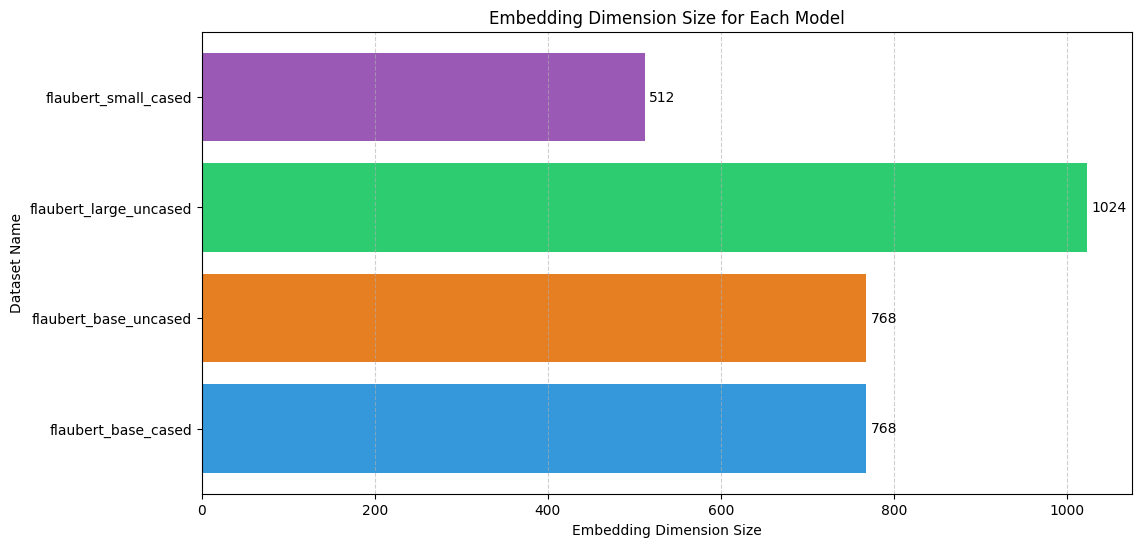

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Define alternating colors
bar_colors = ["#3498db", "#e67e22", "#2ecc71", "#9b59b6", "#f1c40f", "#1abc9c", "#d35400", "#16a085", "#c0392b", "#2980b9"]

# Function to plot embedding dimension length with alternating colors
def plot_embedding_dimensions(dataframes):
    dataset_names = []
    embedding_sizes = []

    # Extract embedding sizes
    for name, df in dataframes.items():
        # The number of embedding dimensions is the total columns minus the "Word" and "Gender" columns
        if "Gender" in df.columns and "Word" in df.columns:
            embedding_size = df.shape[1] - 2  # Subtract "Word" and "Gender" columns
        else:
            embedding_size = df.shape[1] - 1  # If "Gender" is missing, assume only "Word" is non-embedding

        dataset_names.append(name)
        embedding_sizes.append(embedding_size)

    # Create horizontal bar chart
    y_positions = np.arange(len(dataset_names))  # Y-axis positions

    plt.figure(figsize=(12, 6))

    # Plot bars with alternating colors
    for i, (name, size) in enumerate(zip(dataset_names, embedding_sizes)):
        plt.barh(y_positions[i], size, color=bar_colors[i % len(bar_colors)])  # Alternate colors
        plt.text(size + 5, y_positions[i], str(size), va="center", fontsize=10, color="black")

    # Labels and Title
    plt.xlabel("Embedding Dimension Size")
    plt.ylabel("Dataset Name")
    plt.title("Embedding Dimension Size for Each Model")
    plt.yticks(y_positions, dataset_names)  # Set dataset names on y-axis
    plt.grid(axis="x", linestyle="--", alpha=0.6)

    # Show plot
    plt.show()

# Call the function to plot embedding dimension lengths
plot_embedding_dimensions(dataframes)


### 2.4 Class Distribution and Balancing

Showing French Adjectives Original Gender Distribution:


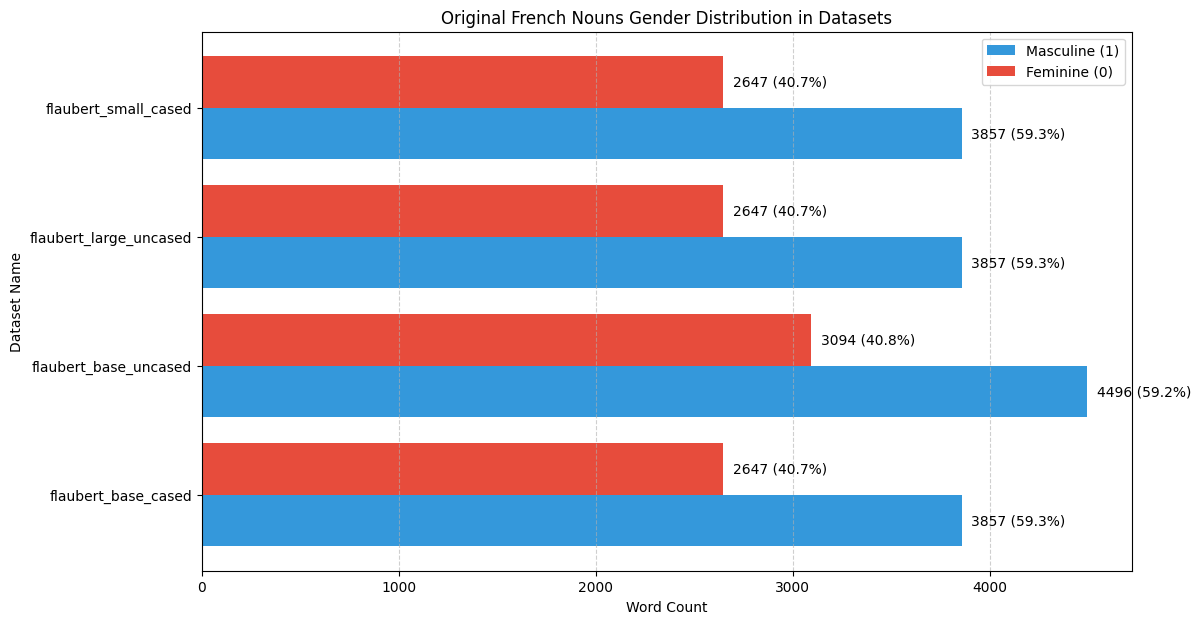

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot gender distribution as a horizontal bar chart
def plot_gender_distribution_bar_chart(dataframes, title="Gender Distribution in Datasets"):
    dataset_names = []
    masculine_counts = []
    feminine_counts = []
    total_counts = []

    # Extract gender counts for each dataset
    for name, df in dataframes.items():
        if "Gender" in df.columns:
            gender_counts = df["Gender"].value_counts()
            dataset_names.append(name)
            masculine_count = gender_counts.get(1, 0)  # Count Masculine (1)
            feminine_count = gender_counts.get(0, 0)  # Count Feminine (0)
            total_count = masculine_count + feminine_count  # Total words

            masculine_counts.append(masculine_count)
            feminine_counts.append(feminine_count)
            total_counts.append(total_count)

    # Convert counts to percentages
    masculine_percentages = [round((m / t) * 100, 1) if t > 0 else 0 for m, t in zip(masculine_counts, total_counts)]
    feminine_percentages = [round((f / t) * 100, 1) if t > 0 else 0 for f, t in zip(feminine_counts, total_counts)]

    # Bar width
    bar_width = 0.4
    y_positions = np.arange(len(dataset_names))  # Y-axis positions

    # Create figure
    plt.figure(figsize=(12, 7))

    # Plot bars for Masculine and Feminine
    plt.barh(y_positions - bar_width/2, masculine_counts, height=bar_width, label="Masculine (1)", color="#3498db")
    plt.barh(y_positions + bar_width/2, feminine_counts, height=bar_width, label="Feminine (0)", color="#e74c3c")

    # Add data labels (both count and percentage) on bars
    for i, (m_count, f_count, m_percent, f_percent) in enumerate(zip(masculine_counts, feminine_counts, masculine_percentages, feminine_percentages)):
        plt.text(m_count + 50, y_positions[i] - bar_width/2, f"{m_count} ({m_percent}%)", va="center", fontsize=10, color="black")
        plt.text(f_count + 50, y_positions[i] + bar_width/2, f"{f_count} ({f_percent}%)", va="center", fontsize=10, color="black")

    # Labels and Title
    plt.xlabel("Word Count")
    plt.ylabel("Dataset Name")
    plt.title(title)
    plt.yticks(y_positions, dataset_names)  # Set dataset names on y-axis
    plt.legend()
    plt.grid(axis="x", linestyle="--", alpha=0.6)

    # Show plot
    plt.show()

# Show original distribution
print("Showing French Adjectives Original Gender Distribution:")
plot_gender_distribution_bar_chart(dataframes, title="Original French Nouns Gender Distribution in Datasets")


Showing French Adjectives Gender Distribution After Undersampling:


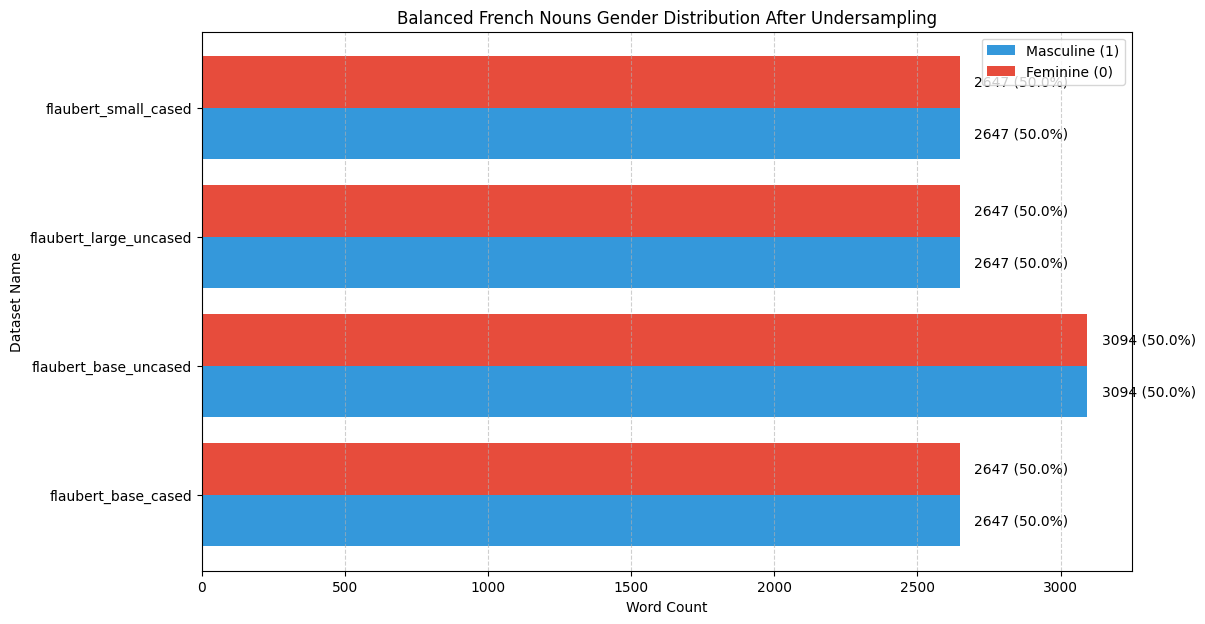

In [6]:
# Apply undersampling (reduce larger class to match smaller class)
balanced_dataframes = {}
for name, df in dataframes.items():
    if "Gender" in df.columns:
        masculine_df = df[df["Gender"] == 1]
        feminine_df = df[df["Gender"] == 0]

        # Find the smaller class size
        min_class_size = min(len(masculine_df), len(feminine_df))

        # Randomly sample from both classes
        masculine_sampled = masculine_df.sample(min_class_size, random_state=42)
        feminine_sampled = feminine_df.sample(min_class_size, random_state=42)

        # Concatenate and shuffle
        balanced_df = pd.concat([masculine_sampled, feminine_sampled]).sample(frac=1, random_state=42)

        # Store the balanced dataset
        balanced_dataframes[name] = balanced_df

# Show distribution after balancing
print("\nShowing French Adjectives Gender Distribution After Undersampling:")
plot_gender_distribution_bar_chart(balanced_dataframes, title="Balanced French Nouns Gender Distribution After Undersampling")


# Step 3) Train a Simple Perceptron (Baseline on all Embeddings)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report

# Set dataset size percentage for training
dataset_percentage = 99  # Change this to adjust dataset sampling size from each dataset

# Dictionary to store model performance
model_accuracies = {}

# Dictionary to store trained models and test data
trained_models = {}
test_data = {}

# Loop through each dataset and train a Perceptron model
for name, df in dataframes.items():
    print("-" * 70)
    print(f"\nTraining Perceptron Model on {name} Dataset... ")

    # Ensure dataset has "Gender" and embeddings (excluding "Word" column)
    if "Gender" in df.columns and "Word" in df.columns:
        X = df.drop(columns=["Word", "Gender"]).values  # Feature vectors (embeddings)
        y = df["Gender"].values  # Target labels (0 = Feminine, 1 = Masculine)
    else:
        print(f"Skipping {name} (Missing required columns)")
        continue

    # Select subset based on dataset_percentage
    sample_size = int((dataset_percentage / 100) * len(df))

    # Check if enough samples exist after sampling
    if sample_size < 2:
        print(f"{name} dataset is too small after sampling, skipping...")
        continue

    # Properly sample `sample_size` instances
    X_sample, _, y_sample, _ = train_test_split(X, y, train_size=sample_size / len(df), stratify=y, random_state=42)

    # Split into training (80%) and testing (20%)
    X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42, stratify=y_sample)

    # Standardize embeddings
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train Perceptron model
    perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
    perceptron.fit(X_train, y_train)

    # Store trained model and test data
    trained_models[name] = perceptron
    test_data[name] = X_test  # Store X_test for SHAP analysis

    # Predictions
    y_pred = perceptron.predict(X_test)

    # Model Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy  # Store accuracy
    print(f"\nAccuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred, target_names=["Feminine (0)", "Masculine (1)"]))


----------------------------------------------------------------------

Training Perceptron Model on flaubert_base_cased Dataset... 

Accuracy: 0.8113
               precision    recall  f1-score   support

 Feminine (0)       0.77      0.77      0.77       524
Masculine (1)       0.84      0.84      0.84       764

     accuracy                           0.81      1288
    macro avg       0.80      0.81      0.80      1288
 weighted avg       0.81      0.81      0.81      1288

----------------------------------------------------------------------

Training Perceptron Model on flaubert_base_uncased Dataset... 

Accuracy: 0.6534
               precision    recall  f1-score   support

 Feminine (0)       0.59      0.49      0.53       613
Masculine (1)       0.69      0.77      0.72       890

     accuracy                           0.65      1503
    macro avg       0.64      0.63      0.63      1503
 weighted avg       0.65      0.65      0.65      1503

------------------------------

### 3.1 Evaluate Performance of Perceptron (on all available embeddings)

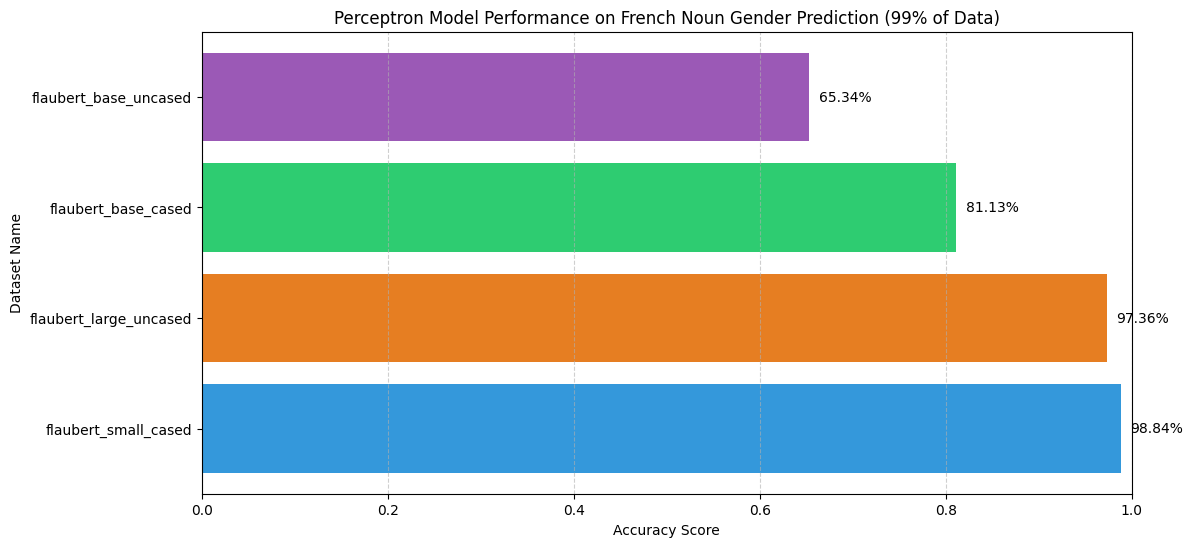

In [8]:
# Sort models by accuracy
sorted_models = sorted(model_accuracies.items(), key=lambda x: x[1], reverse=True)
model_names, accuracies = zip(*sorted_models)

# Plot Bar Chart
plt.figure(figsize=(12, 6))
bar_colors = ["#3498db", "#e67e22", "#2ecc71", "#9b59b6", "#f1c40f", "#1abc9c", "#d35400", "#16a085", "#c0392b", "#2980b9"]
plt.barh(model_names, accuracies, color=[bar_colors[i % len(bar_colors)] for i in range(len(model_names))])

# Add data labels
for i, acc in enumerate(accuracies):
    plt.text(acc + 0.01, i, f"{acc:.2%}", va="center", fontsize=10, color="black")

# Labels and Title
plt.xlabel("Accuracy Score")
plt.ylabel("Dataset Name")
plt.title(f"Perceptron Model Performance on French Noun Gender Prediction ({dataset_percentage}% of Data)")
plt.xlim(0, 1)  # Accuracy scale from 0 to 1
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Show plot
plt.show()

# Step 4) Applying SHAP to Understand Global Features Importance


--- Processing SHAP Feature Importance for flaubert_base_cased ---


PermutationExplainer explainer: 1289it [41:02,  1.91s/it]
<ipython-input-9-38bbc5dc7e7f>:30: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, feature_names=[f"Dim {i}" for i in range(embedding_dim)])



--- SHAP Feature Importance Plot for flaubert_base_cased ---


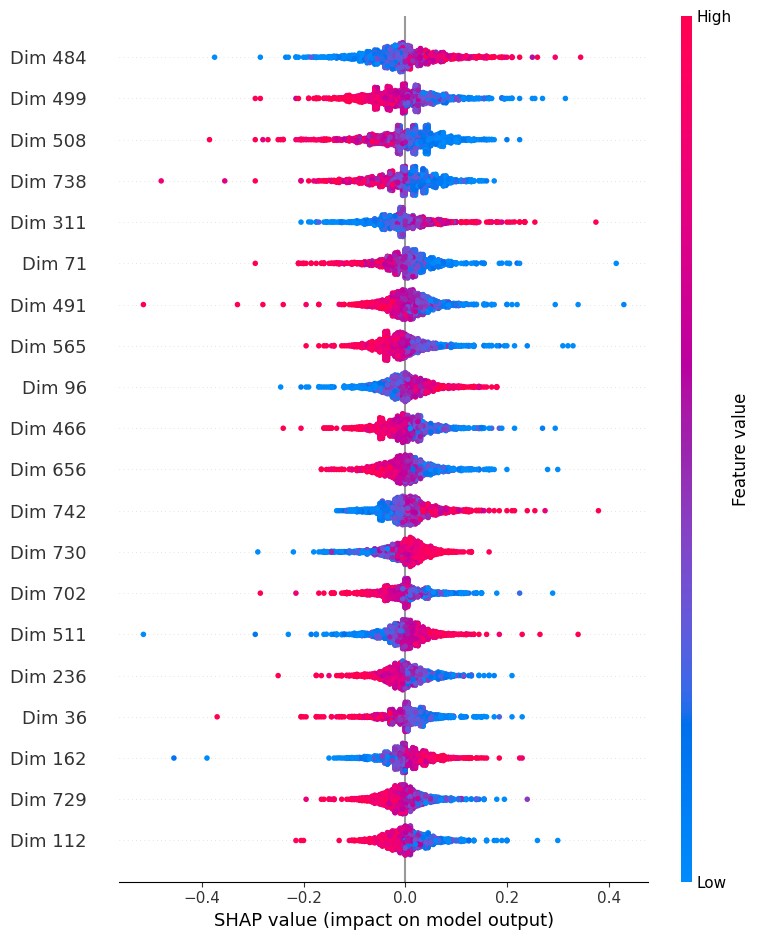


--- Processing SHAP Feature Importance for flaubert_base_uncased ---


PermutationExplainer explainer: 1504it [48:20,  1.94s/it]
<ipython-input-9-38bbc5dc7e7f>:30: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, feature_names=[f"Dim {i}" for i in range(embedding_dim)])



--- SHAP Feature Importance Plot for flaubert_base_uncased ---


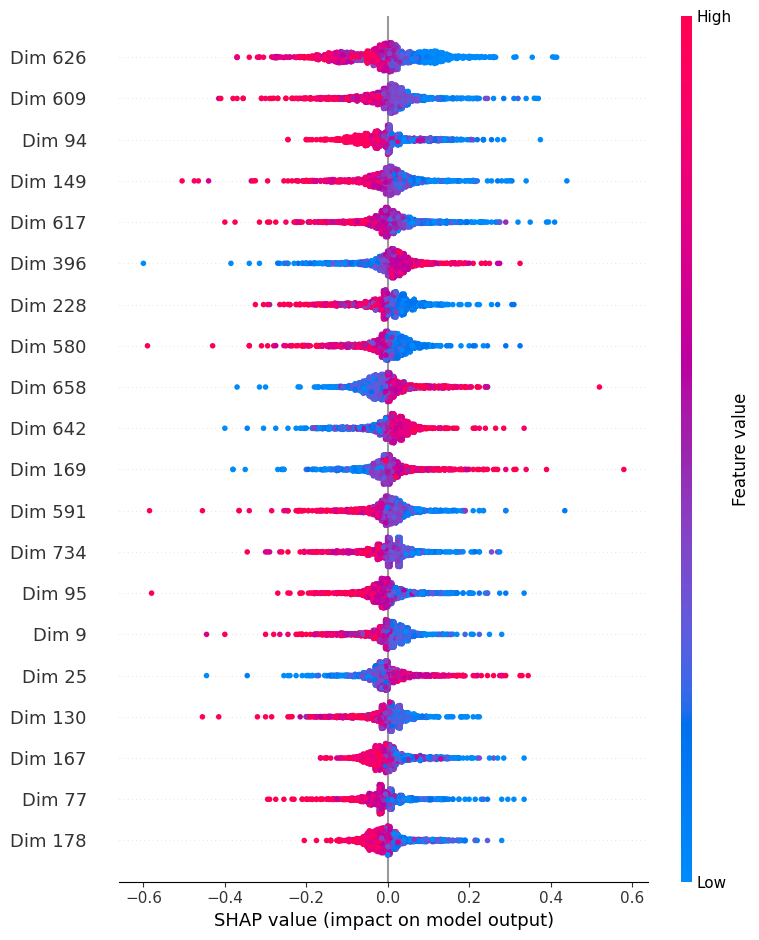


--- Processing SHAP Feature Importance for flaubert_large_uncased ---


PermutationExplainer explainer: 1289it [1:11:00,  3.32s/it]
<ipython-input-9-38bbc5dc7e7f>:30: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, feature_names=[f"Dim {i}" for i in range(embedding_dim)])



--- SHAP Feature Importance Plot for flaubert_large_uncased ---


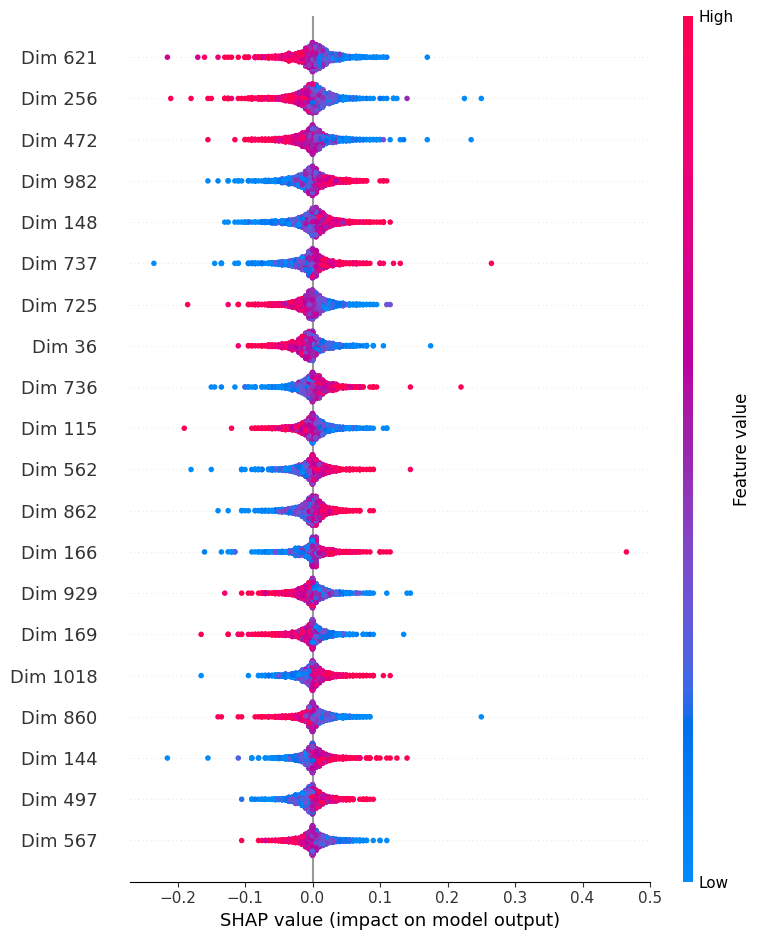


--- Processing SHAP Feature Importance for flaubert_small_cased ---


PermutationExplainer explainer: 1289it [19:39,  1.08it/s]
<ipython-input-9-38bbc5dc7e7f>:30: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, feature_names=[f"Dim {i}" for i in range(embedding_dim)])



--- SHAP Feature Importance Plot for flaubert_small_cased ---


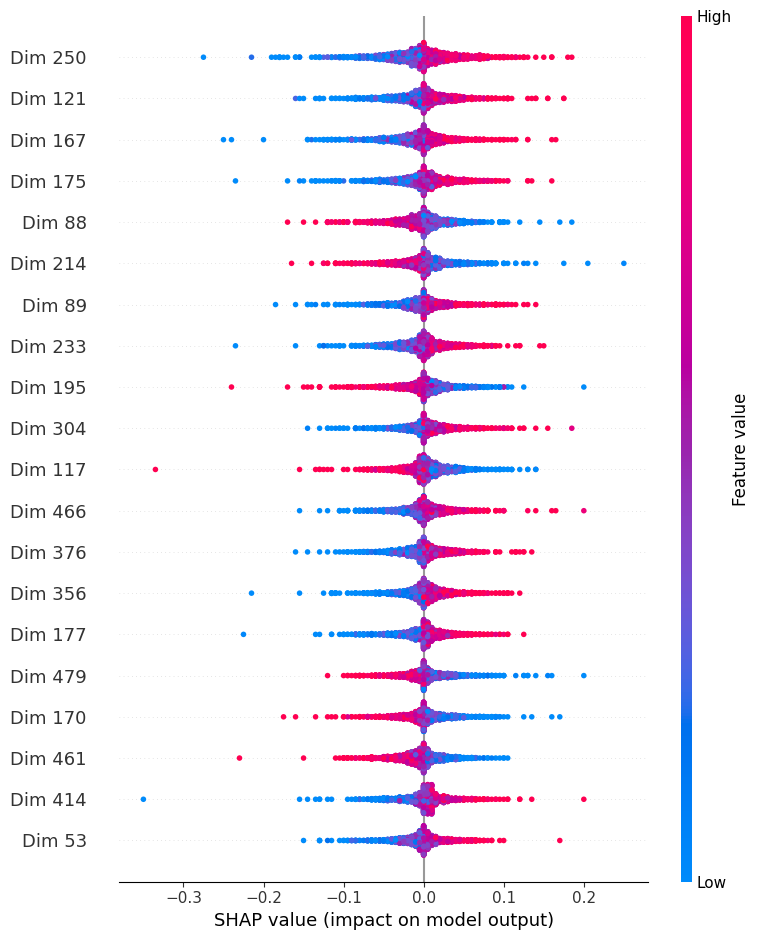

In [9]:
import shap
import numpy as np

# Dictionary to store feature importance for each model
shap_feature_dict = {}

# Loop through trained models and apply SHAP
for name in trained_models.keys():
    print(f"\n--- Processing SHAP Feature Importance for {name} ---")

    # Retrieve stored X_test for the model
    X_test = test_data[name]  # Use the stored test dataset
    perceptron = trained_models[name]  # Use the already trained model

    # Get embedding dimension length dynamically
    embedding_dim = X_test.shape[1]

    # Apply SHAP
    explainer = shap.Explainer(perceptron.predict, X_test)
    shap_values = explainer(X_test, max_evals=embedding_dim * 2 + 1)

    # Compute mean absolute SHAP values per feature
    mean_abs_shap_values = np.abs(shap_values.values).mean(axis=0)

    # Store feature importance for this model
    shap_feature_dict[name] = mean_abs_shap_values

    # Plot SHAP summary for this model
    print(f"\n--- SHAP Feature Importance Plot for {name} ---")
    shap.summary_plot(shap_values, X_test, feature_names=[f"Dim {i}" for i in range(embedding_dim)])


### 4.1 Saving SHAP Feature Importance Results

In [10]:
import pandas as pd
import numpy as np

# Find the maximum embedding dimension across all models
max_embedding_dim = max(len(v) for v in shap_feature_dict.values())

# Ensure all feature importance arrays have the same length by padding with NaN
for model in shap_feature_dict.keys():
    current_length = len(shap_feature_dict[model])
    if current_length < max_embedding_dim:
        shap_feature_dict[model] = np.pad(
            shap_feature_dict[model], (0, max_embedding_dim - current_length), constant_values=np.nan
        )

# Convert SHAP results into a single DataFrame
shap_feature_importance_all = pd.DataFrame(shap_feature_dict)

# Add feature column names
shap_feature_importance_all.insert(0, "Feature", [f"Dim {i}" for i in range(max_embedding_dim)])

# Sort by highest importance (mean across all models)
shap_feature_importance_all["Mean Importance"] = shap_feature_importance_all.iloc[:, 1:].mean(axis=1)
shap_feature_importance_all = shap_feature_importance_all.sort_values(by="Mean Importance", ascending=False)

# Save to a single CSV file
csv_filename = "adjectives_shap_feature_importance_all_models.csv"
shap_feature_importance_all.to_csv(csv_filename, index=False)
print(f"\n--- SHAP feature importance saved to {csv_filename} ---")

# Display the table
print("\n--- SHAP Feature Importance Table (Top 50 Features) ---")
display(shap_feature_importance_all.head(50))  # Show the top 50 most important features



--- SHAP feature importance saved to adjectives_shap_feature_importance_all_models.csv ---

--- SHAP Feature Importance Table (Top 50 Features) ---


,Feature,flaubert_base_cased,flaubert_base_uncased,flaubert_large_uncased,flaubert_small_cased,Mean Importance
626,Dim 626,0.017003,0.076783,0.006693,NaN,0.033493
591,Dim 591,0.025551,0.038563,0.014468,NaN,0.026194
609,Dim 609,0.011727,0.050180,0.005606,NaN,0.022504
167,Dim 167,0.020280,0.035363,0.009064,0.024573,0.022320
169,Dim 169,0.025004,0.038580,0.015202,0.006669,0.021364
739,Dim 739,0.023987,0.034787,0.003529,NaN,0.020768
691,Dim 691,0.030889,0.025662,0.004946,NaN,0.020499
617,Dim 617,0.010186,0.045665,0.002286,NaN,0.019379
752,Dim 752,0.024359,0.033480,0.000039,NaN,0.019293
36,Dim 36,0.031790,0.011700,0.017061,0.016052,0.019151


# Step 5) Retrain Perceptron Using Selected SHAP Dimensions

### 5.1 Select Top N% (1, 5, 10, 25, 50, 75, 100) Features from SHAP Importance

In [11]:
import pandas as pd
import numpy as np

# Load the SHAP feature importance results
shap_feature_importance_all = pd.read_csv("adjectives_shap_feature_importance_all_models.csv")

# Dictionary to store selected feature sets for each model
top_features_dict = {}

# Define top SHAPE feature selection percentages
percentages = [1, 5, 10, 25, 50, 75, 100]

# Loop through each model's SHAP importance values
for model_name in shap_feature_importance_all.columns[1:-1]:  # Exclude 'Feature' and 'Mean Importance'
    print(f"\n--- Selecting Features for {model_name} ---")

    # Get the total number of features (dimensions)
    total_features = len(shap_feature_importance_all)

    # Sort feature importance values in descending order
    sorted_features = shap_feature_importance_all[["Feature", model_name]].sort_values(by=model_name, ascending=False)

    # Store top feature sets for different percentages
    top_features_dict[model_name] = {}

    for percent in percentages:
        num_features = int((percent / 100) * total_features)  # Compute top N features
        selected_features = sorted_features["Feature"].head(num_features).tolist()  # Extract top feature names
        top_features_dict[model_name][percent] = selected_features  # Store in dictionary

print("\n--- Feature Selection Completed ---")



--- Selecting Features for flaubert_base_cased ---

--- Selecting Features for flaubert_base_uncased ---

--- Selecting Features for flaubert_large_uncased ---

--- Selecting Features for flaubert_small_cased ---

--- Feature Selection Completed ---


### 5.2 Retrain Perceptrons Using Top N% SHAP Features

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report

# Dictionary to store new model performance
new_model_accuracies = {}

# Loop through each model and retrain using selected features
for model_name, feature_sets in top_features_dict.items():
    print(f"\n--- Retraining Perceptron for {model_name} ---")

    # Skip if we don't have a dataframe for this model
    if model_name not in dataframes:
        print(f"Skipping {model_name} (No dataframe found)")
        continue

    df = dataframes[model_name]

    # Ensure dataset has "Gender" and embeddings
    if "Gender" not in df.columns or "Word" not in df.columns:
        print(f"Skipping {model_name} (Missing required columns)")
        continue

    # Prepare features & target
    X_full = df.drop(columns=["Word", "Gender"])
    y = df["Gender"].values
    X_full.columns = X_full.columns.astype(str)

    for percent, selected_features in feature_sets.items():
        print(f"\n--- Training with Top {percent}% Features ---")

        # Safely parse SHAP feature names
        selected_columns = []
        for feat in selected_features:
            try:
                # Expecting "Dim N"
                idx = feat.split(" ")[1]
                if idx in X_full.columns:
                    selected_columns.append(idx)
                else:
                    print(f"  Warning: dimension '{idx}' not in dataframe columns; skipping it.")
            except Exception as e:
                print(f"  Warning: could not parse feature '{feat}': {e}")

        if not selected_columns:
            print(f"  No valid features found for Top {percent}%; skipping.")
            continue

        X_selected = X_full[selected_columns].values

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            X_selected, y,
            test_size=0.2,
            random_state=42,
            stratify=y
        )

        # Standardize embeddings
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # Train Perceptron model
        perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
        perceptron.fit(X_train, y_train)

        # Predictions & evaluation
        y_pred = perceptron.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        new_model_accuracies[(model_name, percent)] = accuracy

        print(f"Accuracy with Top {percent}% Features: {accuracy:.4f}")
        print(classification_report(
            y_test, y_pred,
            target_names=["Feminine (0)", "Masculine (1)"]
        ))

print("\n--- Perceptron Training Completed ---")



--- Retraining Perceptron for flaubert_base_cased ---

--- Training with Top 1% Features ---
Accuracy with Top 1% Features: 0.5573
               precision    recall  f1-score   support

 Feminine (0)       0.45      0.38      0.41       529
Masculine (1)       0.62      0.68      0.64       772

     accuracy                           0.56      1301
    macro avg       0.53      0.53      0.53      1301
 weighted avg       0.55      0.56      0.55      1301


--- Training with Top 5% Features ---
Accuracy with Top 5% Features: 0.6334
               precision    recall  f1-score   support

 Feminine (0)       0.55      0.57      0.56       529
Masculine (1)       0.70      0.68      0.69       772

     accuracy                           0.63      1301
    macro avg       0.62      0.62      0.62      1301
 weighted avg       0.64      0.63      0.63      1301


--- Training with Top 10% Features ---
Accuracy with Top 10% Features: 0.6841
               precision    recall  f1-score  

# Step 7) LIME-Based Feature Selection & Model Training

## 7.1 Install & Import Required Libraries

In [13]:
!pip install lime  # Install LIME if not already installed

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lime
import lime.lime_tabular
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=17c5426eb72ede31611ec3e8342154d7da4270e28085b649e65a491d78d9ebb2
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


### 7.2 Apply LIME to Identify Important Features

In [14]:
# Set dataset percentage for word selection (for LIME)for computatoinal efficiency
word_percentages = [1]

# Dictionary to store LIME feature importance for each model and percentage
lime_feature_importance = {}

# Loop through each trained model
for name, df in dataframes.items():
    print("-" * 70)
    print(f"\nApplying LIME for {name}...")

    # Ensure dataset has "Gender" and "Word" columns
    if "Gender" in df.columns and "Word" in df.columns:
        X_full = df.drop(columns=["Word", "Gender"])  # Feature embeddings
        y_full = df["Gender"]  # Labels (0 = Feminine, 1 = Masculine)
    else:
        print(f"Skipping {name} (Missing required columns)")
        continue

    # Use stored test data and trained model from previous training
    X_test = test_data[name]
    perceptron = trained_models[name]

    for percent in word_percentages:
        num_samples = int((percent / 100) * len(df))
        # Ensure class balance when selecting words
        masculine_samples = df[df["Gender"] == 1].sample(num_samples // 2, random_state=42)
        feminine_samples = df[df["Gender"] == 0].sample(num_samples // 2, random_state=42)
        sampled_df = pd.concat([masculine_samples, feminine_samples]).sample(frac=1, random_state=42)

        X_sample = sampled_df.drop(columns=["Word", "Gender"]).values
        y_sample = sampled_df["Gender"].values

        # Define LIME explainer with feature names in the format "Dim i"
        explainer = lime.lime_tabular.LimeTabularExplainer(
            X_sample,
            feature_names=[f"Dim {i}" for i in range(X_sample.shape[1])],
            class_names=["Feminine", "Masculine"],
            mode="classification"
        )

        # Define a wrapper function for Perceptron that returns a probability-like output
        def perceptron_predict(X):
            scores = perceptron.decision_function(X)
            # Convert decision scores into a two-column output:
            # first column: indicator if score > 0, second: indicator if score <= 0.
            return np.column_stack([(scores > 0).astype(int), (scores <= 0).astype(int)])

        # Initialize feature importance array for this percentage sample
        feature_importance = np.zeros(X_sample.shape[1])

        # Explain each randomly selected instance in the sample using LIME
        for i in range(len(X_sample)):
            exp = explainer.explain_instance(X_sample[i], perceptron_predict, num_features=X_sample.shape[1])
            for feat, importance in exp.as_list():
                # Use regex to extract the number after "Dim"
                match = re.search(r"Dim\s*(\d+)", feat)
                if match:
                    dim_index = int(match.group(1))
                    if dim_index < X_sample.shape[1]:
                        feature_importance[dim_index] += abs(importance)
                    else:
                        print(f"Skipping feature '{feat}': index {dim_index} out of bounds for {X_sample.shape[1]} dimensions.")
                else:
                    print(f"Skipping invalid feature: {feat}")

        # Normalize aggregated importance by the number of instances explained
        feature_importance /= len(X_sample)
        lime_feature_importance[(name, percent)] = feature_importance


print("\nLIME feature importance has been computed and stored in memory.")

----------------------------------------------------------------------

Applying LIME for flaubert_base_cased...
----------------------------------------------------------------------

Applying LIME for flaubert_base_uncased...
----------------------------------------------------------------------

Applying LIME for flaubert_large_uncased...
----------------------------------------------------------------------

Applying LIME for flaubert_small_cased...

LIME feature importance has been computed and stored in memory.


Save LIME Feature Imoprtance

In [15]:
# Find the max embedding dimension across models (since some models may have 768, others 1024)
max_dim = max([len(v) for v in lime_feature_importance.values()])

# Create a DataFrame with proper alignment
lime_feature_importance_df = pd.DataFrame(index=[f"Dim {i}" for i in range(max_dim)])

# Populate the DataFrame with LIME results
for (name, percent), feature_importance in lime_feature_importance.items():
    # Ensure feature importance array has the correct length by padding with zeros if necessary
    padded_feature_importance = np.zeros(max_dim)
    padded_feature_importance[:len(feature_importance)] = feature_importance  # Fill available values
    lime_feature_importance_df[(name, percent)] = padded_feature_importance

# Save the LIME feature importance data to a CSV file
lime_feature_importance_df.to_csv("adjectives_lime_feature_importance_all_models.csv", index=True)

print("\nLIME feature importance saved to 'adjectives_lime_feature_importance_all_models.csv'")
display(lime_feature_importance_df)


LIME feature importance saved to 'adjectives_lime_feature_importance_all_models.csv'


,"(flaubert_base_cased, 1)","(flaubert_base_uncased, 1)","(flaubert_large_uncased, 1)","(flaubert_small_cased, 1)"
Dim 0,0.018273,0.023659,0.021006,0.012220
Dim 1,0.014570,0.015649,0.014639,0.013868
Dim 2,0.009665,0.026586,0.011640,0.038865
Dim 3,0.030074,0.012801,0.015619,0.020199
Dim 4,0.020773,0.016372,0.012695,0.019468
...,...,...,...,...
Dim 1019,0.000000,0.000000,0.013749,0.000000
Dim 1020,0.000000,0.000000,0.013781,0.000000
Dim 1021,0.000000,0.000000,0.014363,0.000000
Dim 1022,0.000000,0.000000,0.017614,0.000000


### 7.3 Select Top N% Important Features & Retrain Perceptron

In [17]:
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report

# 1) User‐specified percentages
feature_selection_percentages = [1, 5, 10, 25, 50, 75, 100]

# 2) Load LIME importances
lime_df = pd.read_csv("/content/adjectives_lime_feature_importance_all_models.csv")
if 'Unnamed: 0' in lime_df.columns:
    lime_df = lime_df.drop(columns=['Unnamed: 0'])

# 3) Regex to parse columns like "('model_name', 1)"
col_re = re.compile(r"\('(?P<model>[^']+)',\s*(?P<pct>\d+)\)")

# 4) Container for results
lime_model_accuracies = {}

# 5) Loop through each model’s dataframe
for model_name, df in dataframes.items():
    print("\n" + "-"*60)
    print(f"Retraining Perceptron on LIME‐selected features for {model_name}")

    # 5a) Prepare X_full, y
    drop_cols = ["Gender"]
    if "Word" in df.columns:
        drop_cols.append("Word")
    X_full = df.drop(columns=drop_cols)
    y = df["Gender"].values

    # 5b) Find the “base” (smallest) LIME % for ranking
    available_pcts = []
    for col in lime_df.columns:
        m = col_re.match(col)
        if not m:
            continue
        if m.group("model") == model_name:
            available_pcts.append(int(m.group("pct")))
    if not available_pcts:
        print(f"  ✗ No LIME data for {model_name}, skipping.")
        continue

    base_pct = min(available_pcts)
    base_col = f"('{model_name}', {base_pct})"
    importances = lime_df[base_col].values

    # 5c) Align importances length with X_full width
    max_dim = min(len(importances), X_full.shape[1])
    X_base = X_full.iloc[:, :max_dim]
    imp = importances[:max_dim]

    # 6) For each target %, pick top‐k and retrain
    for pct in feature_selection_percentages:
        k = int((pct / 100) * max_dim)
        if k < 1:
            print(f"  • {pct}% → selects <1 feature; skipping.")
            continue

        # Top‐k feature indices
        top_idx = np.argsort(imp)[-k:]
        selected_cols = X_base.columns[top_idx].tolist()
        X_sel = X_base[selected_cols].values

        # Train‐test split
        X_tr, X_te, y_tr, y_te = train_test_split(
            X_sel, y,
            test_size=0.2,
            stratify=y,
            random_state=42
        )

        # Standardize
        scaler = StandardScaler()
        X_tr = scaler.fit_transform(X_tr)
        X_te = scaler.transform(X_te)

        # Train Perceptron
        clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
        clf.fit(X_tr, y_tr)

        # Evaluate
        y_pred = clf.predict(X_te)
        acc = accuracy_score(y_te, y_pred)
        lime_model_accuracies[(model_name, pct)] = acc

        print(f"  • LIME Top {pct}% ({k} dims): acc={acc:.4f}")
        print(classification_report(
            y_te, y_pred,
            target_names=["Feminine (0)", "Masculine (1)"]
        ))

print("\nAll retraining done. Results in `lime_model_accuracies`.")



------------------------------------------------------------
Retraining Perceptron on LIME‐selected features for flaubert_base_cased
  • LIME Top 1% (7 dims): acc=0.5288
               precision    recall  f1-score   support

 Feminine (0)       0.41      0.36      0.39       529
Masculine (1)       0.60      0.64      0.62       772

     accuracy                           0.53      1301
    macro avg       0.50      0.50      0.50      1301
 weighted avg       0.52      0.53      0.52      1301

  • LIME Top 5% (38 dims): acc=0.5603
               precision    recall  f1-score   support

 Feminine (0)       0.47      0.55      0.50       529
Masculine (1)       0.65      0.57      0.61       772

     accuracy                           0.56      1301
    macro avg       0.56      0.56      0.55      1301
 weighted avg       0.57      0.56      0.56      1301

  • LIME Top 10% (76 dims): acc=0.6603
               precision    recall  f1-score   support

 Feminine (0)       0.61      

# 8) Classification Accuracy Comparison: Baseline vs SHAP vs LIME vs Ekaterina

Top N% to test: 1, 5, 10, 25, 50, 75, 100 (Baseline)

In [18]:
import pandas as pd, pickle, numpy as np
from IPython.display import display

# 1. Load Ekaterina’s pickle & average 5‐fold Perceptron scores
# https://github.com/langlois5454/HarvestWE/blob/main/Data/best_results/gender_adj_accs.pickle
EKA_ACC_PATH = "/content/gender_adj_accs.pickle"
with open(EKA_ACC_PATH, "rb") as f:
    ek_raw = pickle.load(f)

model_map = {
    "flau_small_c": "flaubert_small_cased",
    "flau_base_c":  "flaubert_base_cased",
    "flau_base_u":  "flaubert_base_uncased",
    "flau_large_c": "flaubert_large_uncased",
}
thresholds = [1, 5, 10, 25, 50, 75, 100]    # Now includes 100 for baseline

eka_model_accuracies = {}
for short, pretty in model_map.items():
    for p in thresholds:
        if p == 100:
            # Look for "All dims" key for 100%
            key = "All dims"
        else:
            key = f"Perc{p}"
        if key in ek_raw[short]:
            vals = ek_raw[short][key]
            eka_model_accuracies[(pretty, p)] = float(np.mean(vals))

# 2. Helper to fetch from any accuracy dict
def fetch(d, m, p=None):
    return d.get(m) if p is None else d.get((m, p))

# Assumes you already have in memory:
#   model_accuracies     (baseline, key=model)
#   new_model_accuracies (SHAP, key=(model,p))
#   lime_model_accuracies(LIME, key=(model,p))

# 3. Build empty table
all_models = sorted(model_map.values())
methods = ["SHAP","LIME","EKA"]
rows = [f"{p}%" for p in thresholds]
cols = pd.MultiIndex.from_product([all_models, methods])

acc_table = pd.DataFrame(index=rows, columns=cols, dtype=object)

for m in all_models:
    for p in thresholds:
        row = f"{p}%"
        # SHAP
        val = fetch(new_model_accuracies, m, p)
        acc_table.loc[row, (m, "SHAP")] = f"{val*100:.1f}" if val is not None else "–"
        # LIME
        val = fetch(lime_model_accuracies, m, p)
        acc_table.loc[row, (m, "LIME")] = f"{val*100:.1f}" if val is not None else "–"
        # EKA
        val = fetch(eka_model_accuracies, m, p)
        acc_table.loc[row, (m, "EKA")] = f"{val*100:.1f}" if val is not None else "–"


print("ACCURACY COMPARISON (rows=Top N%; cols=model×method, 100% is full baseline) ###")
display(acc_table)


ACCURACY COMPARISON (rows=Top N%; cols=model×method, 100% is full baseline) ###


flaubert_base_cased             flaubert_base_uncased              \
                    SHAP  LIME   EKA                  SHAP  LIME   EKA   
1%                  55.7  52.9  60.8                  50.9  51.1  55.9   
5%                  63.3  56.0  63.6                  60.2  57.8  57.6   
10%                 68.4  66.0  64.6                  57.2  54.4  58.0   
25%                 78.2  76.0  64.1                  59.2  57.7  58.3   
50%                 80.8  77.3  62.2                  62.8  64.6  57.0   
75%                 79.7  79.9  60.2                  63.0  63.4  55.8   
100%                79.7  79.7  58.4                  63.0  63.0  54.6   

     flaubert_large_uncased             flaubert_small_cased              
                       SHAP  LIME   EKA                 SHAP  LIME   EKA  
1%                     65.3  59.9  77.4                 71.0  64.0  72.1  
5%                     81.0  80.2  89.4                 93.0  78.5  88.1  
10%                    89.2  90.2  91.2                 96.0  86.5  91.1  
25%                    96.5  95.5  92.7                 98.4  97.4  93.3  
50%                    96.7  96.8  92.6                 98.2  98.3  94.0  
75%                    96.5  96.6  92.2                 98.2  98.2  93.3  
100%                   95.8  95.8  91.3                 98.2  98.2  92.0

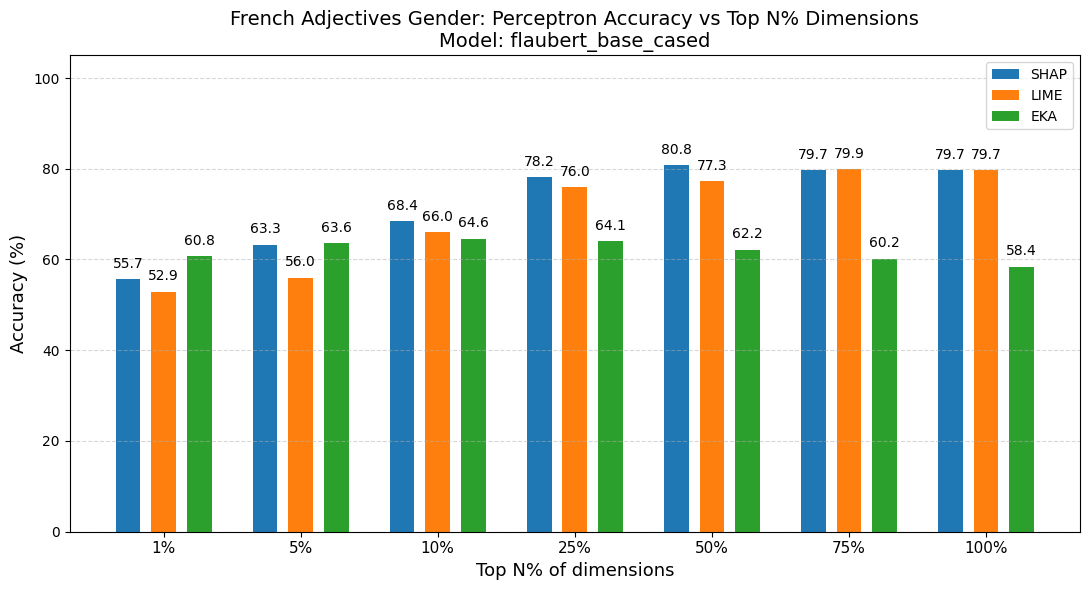

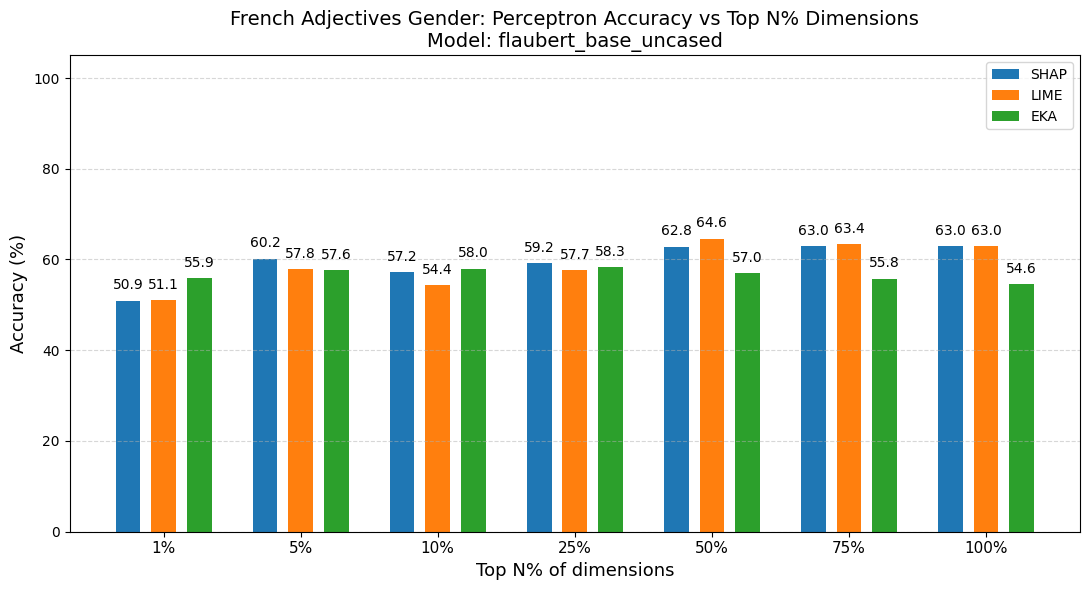

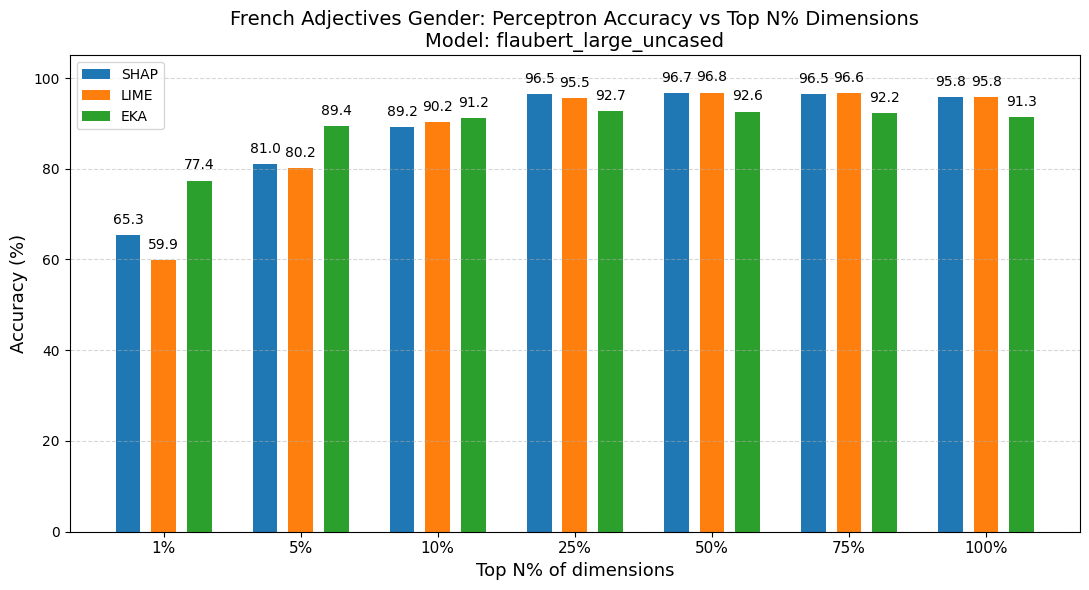

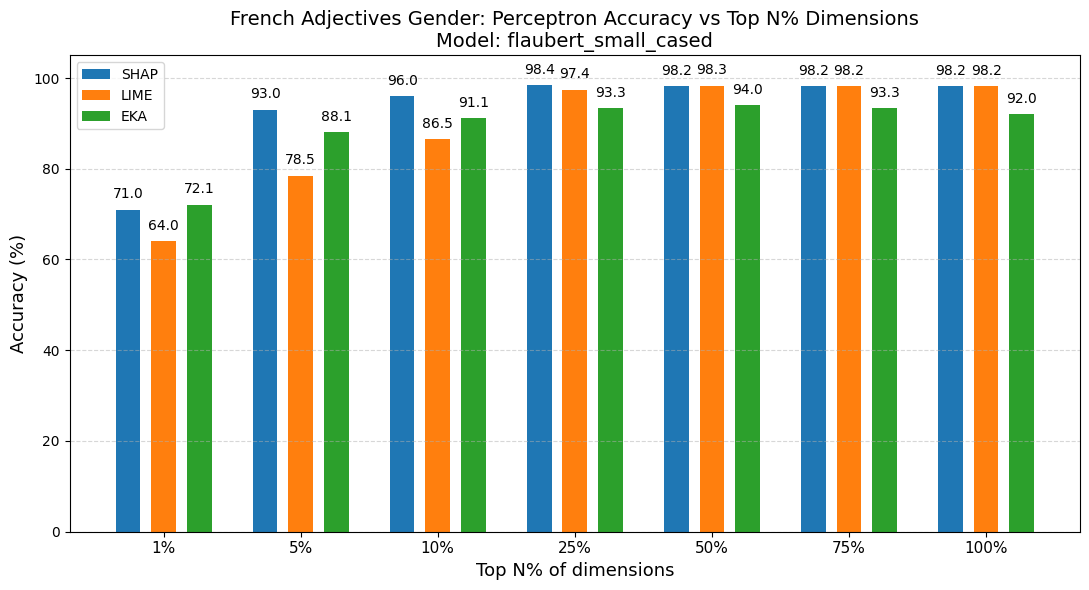

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Convert acc_table to percentage float for plotting
acc_numeric = acc_table.copy()
for col in acc_numeric.columns:
    acc_numeric[col] = acc_numeric[col].apply(lambda x: float(x) if x not in ["–", None, np.nan] else np.nan)
acc_numeric.index = [int(x.rstrip("%")) for x in acc_numeric.index]

bar_width = 0.18   # Narrower bars for more space between them
x = np.arange(len(acc_numeric.index))
bar_gap = 0.08     # Extra gap between bar groups

for model in all_models:
    fig, ax = plt.subplots(figsize=(11, 6))
    # Calculate actual positions with extra gap
    n_methods = len(methods)
    total_width = n_methods * bar_width + (n_methods-1)*bar_gap
    for i, method in enumerate(methods):
        col = (model, method)
        accs = acc_numeric[col].values
        bar_pos = x - (total_width/2) + i*(bar_width + bar_gap) + bar_width/2
        bars = ax.bar(bar_pos, accs, width=bar_width, label=method)
        # Data labels: horizontal, 1 decimal, a little above the bar
        for rect in bars:
            height = rect.get_height()
            if not np.isnan(height):
                ax.annotate(f'{height:.1f}',
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 6),  # More offset for clarity
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize=10, rotation=0)
    ax.set_xticks(x)
    ax.set_xticklabels([f"{k}%" for k in acc_numeric.index], fontsize=11)
    ax.set_xlabel("Top N% of dimensions", fontsize=13)
    ax.set_ylabel("Accuracy (%)", fontsize=13)
    ax.set_title(f"French Adjectives Gender: Perceptron Accuracy vs Top N% Dimensions\nModel: {model}", fontsize=14)
    ax.set_ylim(0, 105)
    ax.legend()
    ax.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


# 9) Shared Dimensions: LIME vs SHAP vs Ekaterina

In [26]:
# -------------------------------------------------------------
#  Compare LIME, SHAP and Ekaterina’s 5-fold attribution results
# -------------------------------------------------------------
import pandas as pd, math, pickle, re
from IPython.display import display

# ---------- 0.  PATHS
LIME_PATH = "/content/adjectives_lime_feature_importance_all_models.csv"
SHAP_PATH = "/content/adjectives_shap_feature_importance_all_models.csv"
EKA_PATH  = "/content/gender_adj_dims.pickle"

# https://github.com/langlois5454/HarvestWE/blob/main/Data/best_results/gender_adj_dims.pickle

# ---------- 1.  LOAD LIME & SHAP CSVs ----------
lime = pd.read_csv(LIME_PATH)
shap = pd.read_csv(SHAP_PATH)

# first column →  Feature
for df in (lime, shap):
    if "Feature" not in df.columns:
        df.rename(columns={df.columns[0]: "Feature"}, inplace=True)
    df["Feature"] = df["Feature"].astype(str).str.strip()

# helper: find correct model column despite parentheses / tuple headers
def find_col(df, model_name):
    targ = re.sub(r"[^\w]", "", model_name.lower())
    for col in df.columns:
        txt = "".join(col) if isinstance(col, tuple) else str(col)
        if targ in re.sub(r"[^\w]", "", txt.lower()):
            return col
    raise KeyError(f"Column for “{model_name}” not found")

# ---------- 2.  LOAD Ekaterina ----------
with open(EKA_PATH, "rb") as f:
    ek_raw = pickle.load(f)

model_map = {                     # pretty ↔ key inside the pickle
    "flaubert_small_cased":   "flau_small_c",
    "flaubert_base_cased":    "flau_base_c",
    "flaubert_base_uncased":  "flau_base_u",
    "flaubert_large_uncased": "flau_large_c",   # she ran a *cased* large model
}
embed_size = {                   # true hidden sizes
    "flaubert_small_cased":   512,
    "flaubert_base_cased":    768,
    "flaubert_base_uncased":  768,
    "flaubert_large_uncased": 1024,
}
thresholds = [1, 5, 10, 25, 50, 75]

# ---------- 3.  BUILD Ekaterina’s *union per percentage* ----------
ek_dims = {m: {p: set() for p in thresholds} for m in model_map}
for m_pretty, m_key in model_map.items():
    mdict = ek_raw[m_key]                      # e.g. {"Perc1":[fold1,…fold5], …}
    for p in thresholds:
        folds_here = mdict.get(f"Perc{p}", []) # list-of-lists (5 folds)
        ek_dims[m_pretty][p] = set().union(*folds_here)

# ---------- 4.  MAIN LOOP ----------
results = {}
for model in model_map:
    L_col = find_col(lime, model)
    S_col = find_col(shap, model)

    # rank LIME & SHAP once
    l_df = lime[["Feature", L_col]].copy()
    s_df = shap[["Feature", S_col]].copy()
    l_df["dim"] = l_df["Feature"].str.extract(r"(\d+)").astype(int)
    s_df["dim"] = s_df["Feature"].str.extract(r"(\d+)").astype(int)
    l_df["imp"] = pd.to_numeric(l_df[L_col], errors="coerce").fillna(0)
    s_df["imp"] = pd.to_numeric(s_df[S_col], errors="coerce").fillna(0)
    l_df = l_df.reindex(l_df["imp"].abs().sort_values(ascending=False).index)
    s_df = s_df.reindex(s_df["imp"].abs().sort_values(ascending=False).index)

    tot = embed_size[model]
    results[model] = {}
    for p in thresholds:
        k = math.ceil(tot * p / 100)           # top-k dims for this percentage
        L = set(l_df["dim"].iloc[:k])
        S = set(s_df["dim"].iloc[:k])
        E = ek_dims[model][p]                  # union of 5 folds, same p

        ALL =  L &  S & E
        LS  = (L & S) - ALL
        LE  = (L & E) - ALL
        SE  = (S & E) - ALL
        L0  =  L - (S | E)
        S0  =  S - (L | E)
        E0  =  E - (L | S)

        results[model][p] = {
            "Total dims": k,
            "Shared ALL": len(ALL),
            "LIME∩SHAP":  len(LS),
            "LIME∩EKA":   len(LE),
            "SHAP∩EKA":   len(SE),
            "LIME only":  len(L0),
            "SHAP only":  len(S0),
            "EKA only":   len(E0),
        }

# ---------- 5.  DISPLAY ----------
for m, tbl in results.items():
    df = pd.DataFrame.from_dict(tbl, orient="index")
    df.index.name = "Top %"
    print("-" * 40)
    print(f"{m}")
    print("-" * 40)
    display(df)


----------------------------------------
flaubert_small_cased
----------------------------------------


,Total dims,Shared ALL,LIME∩SHAP,LIME∩EKA,SHAP∩EKA,LIME only,SHAP only,EKA only
Top %,,,,,,,,
1,6,1,1,0,0,4,4,8
5,26,6,11,1,2,8,7,22
10,52,14,27,1,4,10,7,53
25,128,56,57,7,6,8,9,105
50,256,168,74,10,9,4,5,136
75,384,317,41,23,23,3,3,87


----------------------------------------
flaubert_base_cased
----------------------------------------


,Total dims,Shared ALL,LIME∩SHAP,LIME∩EKA,SHAP∩EKA,LIME only,SHAP only,EKA only
Top %,,,,,,,,
1,8,1,3,0,0,4,4,13
5,39,4,21,4,3,10,11,67
10,77,18,34,5,3,20,22,109
25,192,80,75,13,16,24,21,213
50,384,257,75,40,39,12,13,242
75,576,493,13,69,70,1,0,118


----------------------------------------
flaubert_base_uncased
----------------------------------------


,Total dims,Shared ALL,LIME∩SHAP,LIME∩EKA,SHAP∩EKA,LIME only,SHAP only,EKA only
Top %,,,,,,,,
1,8,2,3,1,0,2,3,17
5,39,13,17,1,1,8,8,61
10,77,24,36,2,6,15,11,132
25,192,95,70,12,16,15,11,236
50,384,298,50,32,28,4,8,281
75,576,517,6,53,52,0,1,136


----------------------------------------
flaubert_large_uncased
----------------------------------------


,Total dims,Shared ALL,LIME∩SHAP,LIME∩EKA,SHAP∩EKA,LIME only,SHAP only,EKA only
Top %,,,,,,,,
1,11,1,4,0,1,6,5,21
5,52,10,26,0,4,16,12,72
10,103,27,54,5,3,17,19,129
25,256,99,121,9,19,27,17,233
50,512,296,151,43,40,22,25,274
75,768,620,45,94,95,9,8,135



MODEL: flaubert_small_cased


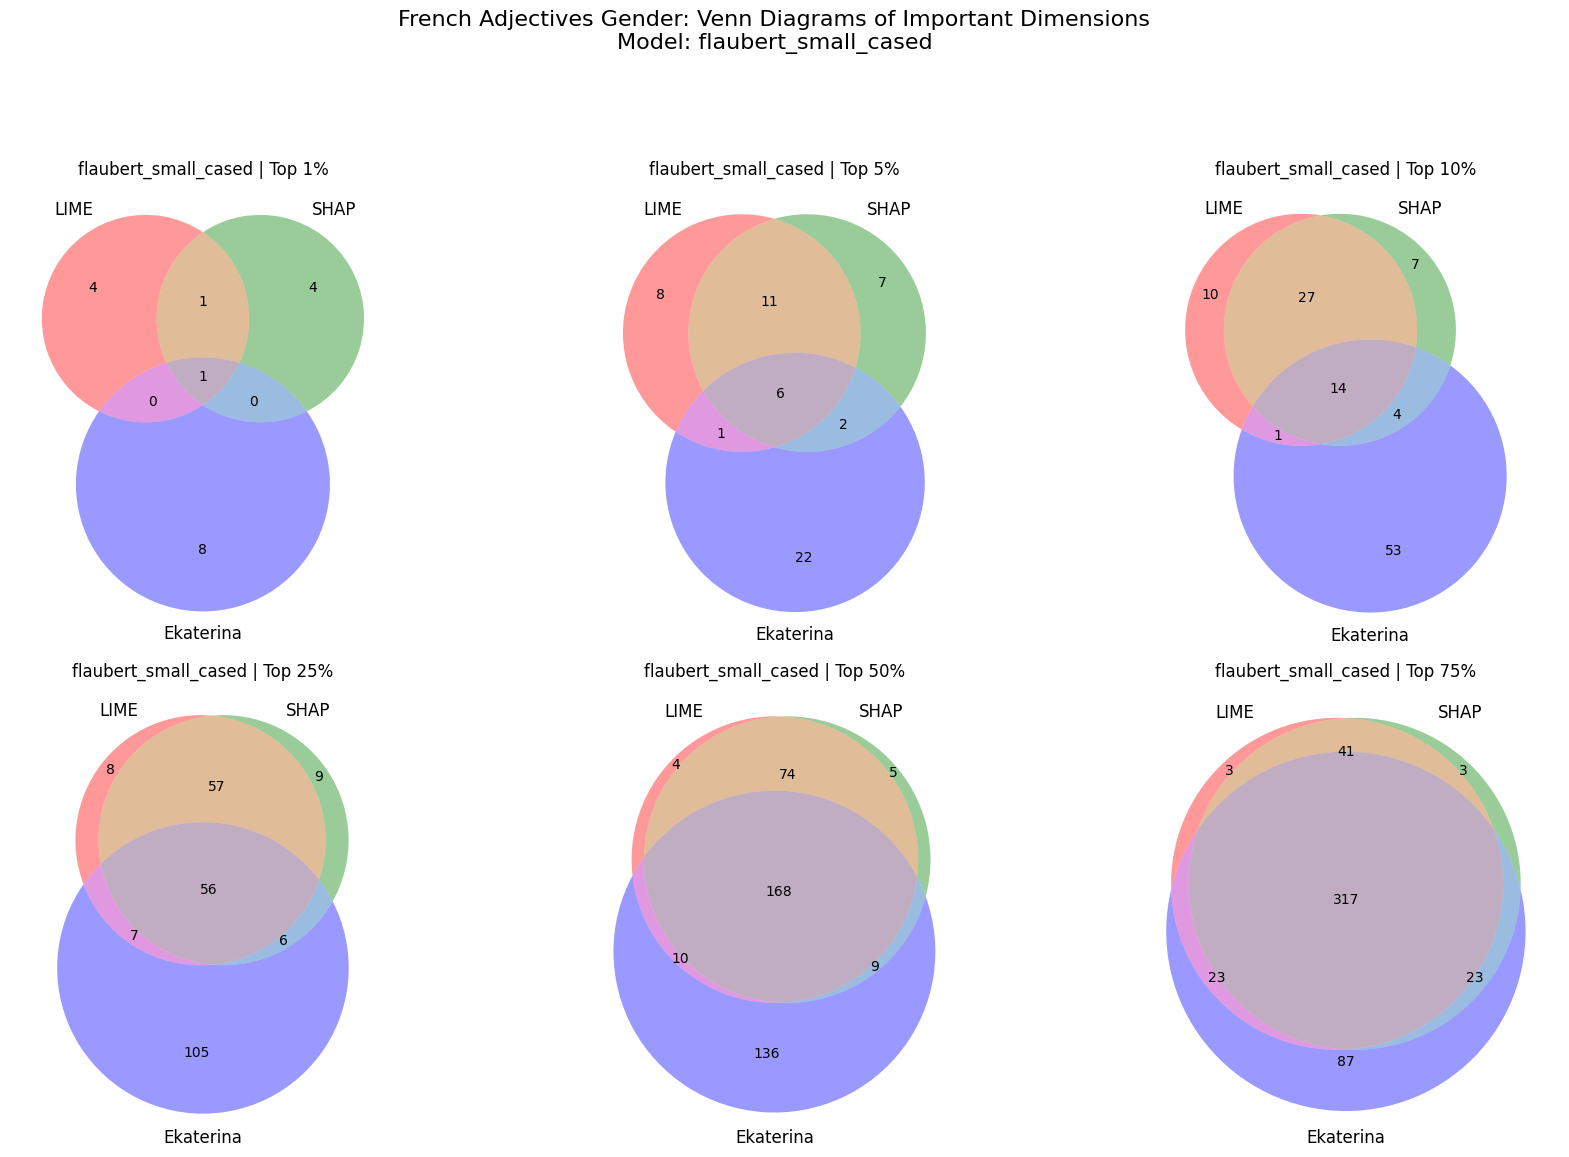


MODEL: flaubert_base_cased


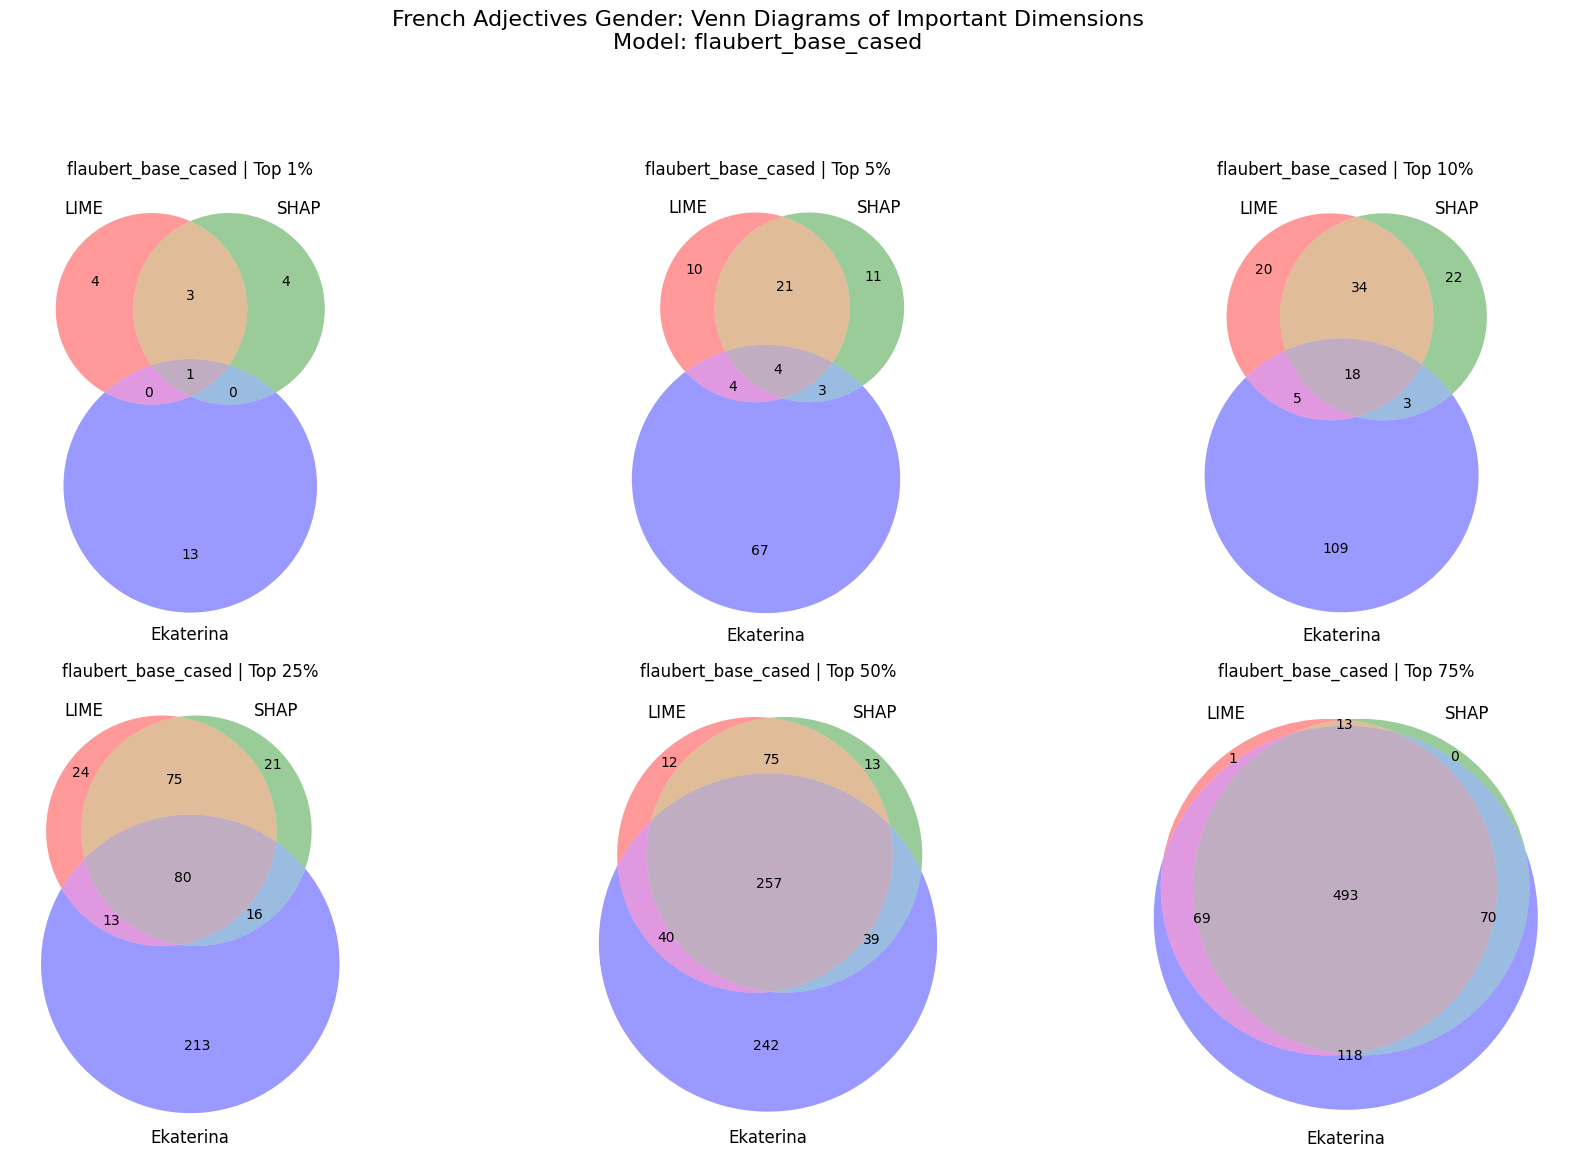


MODEL: flaubert_base_uncased


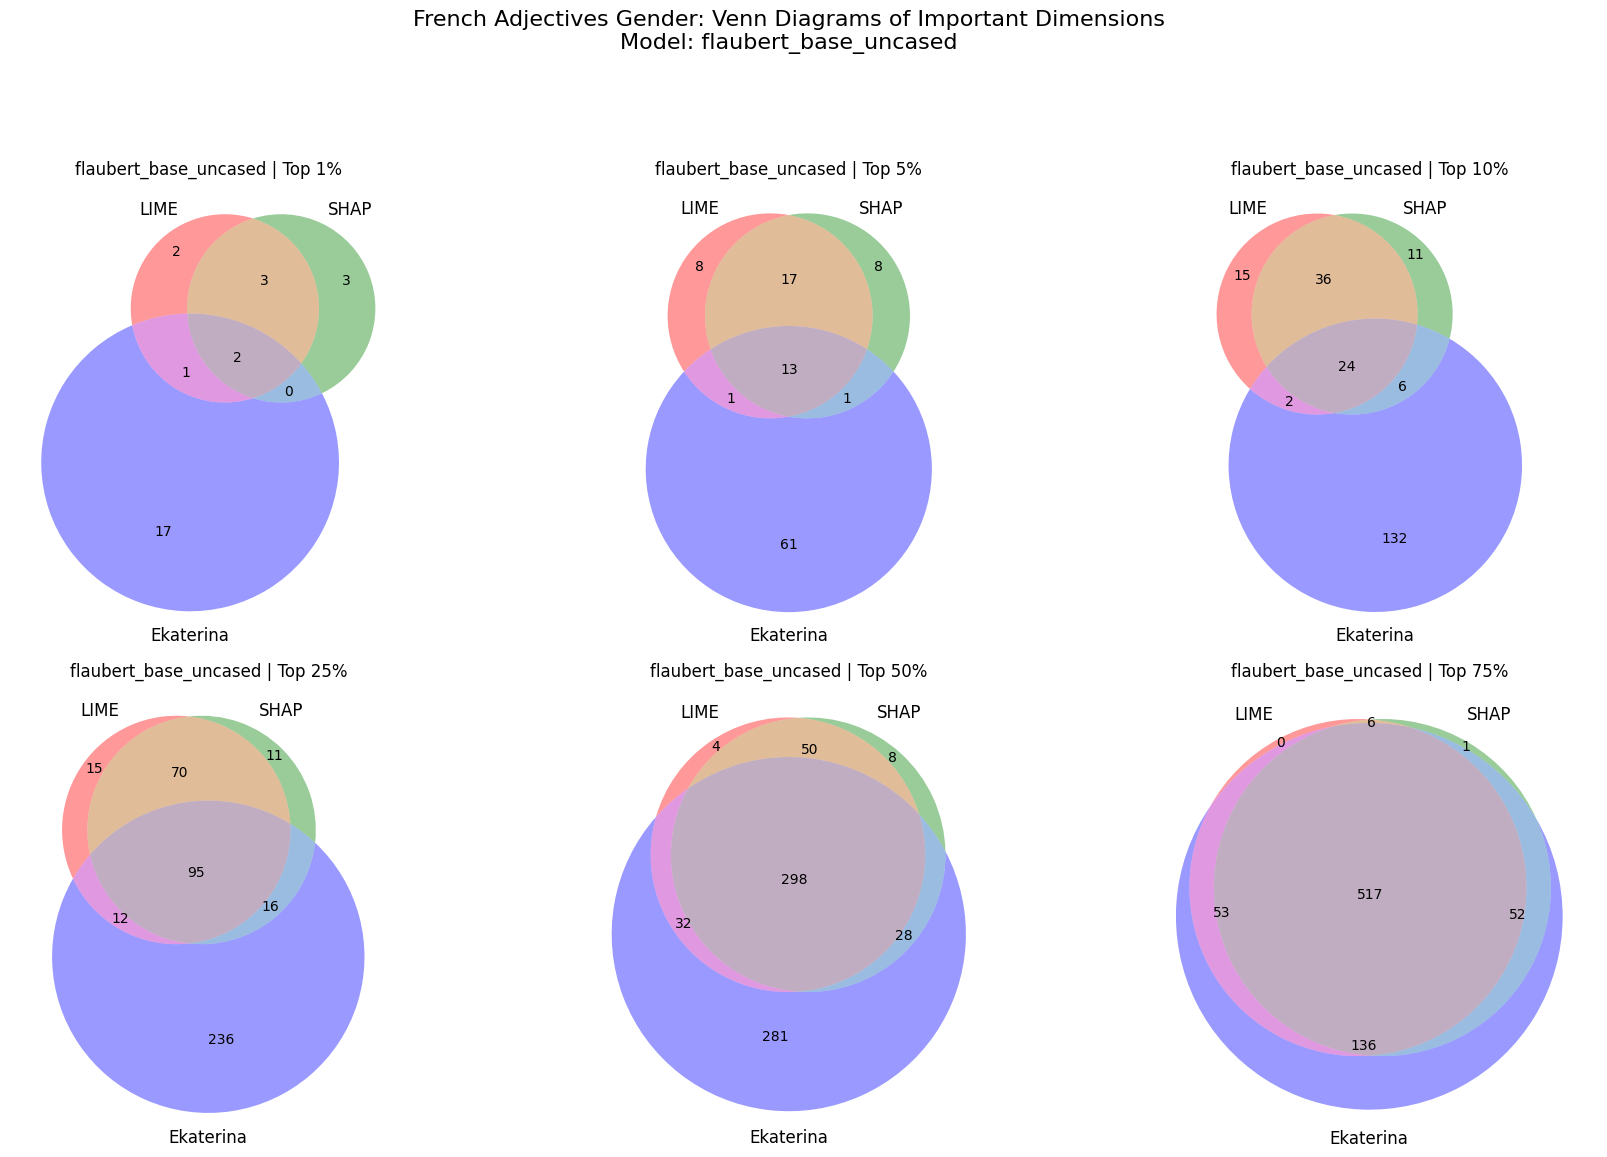


MODEL: flaubert_large_uncased


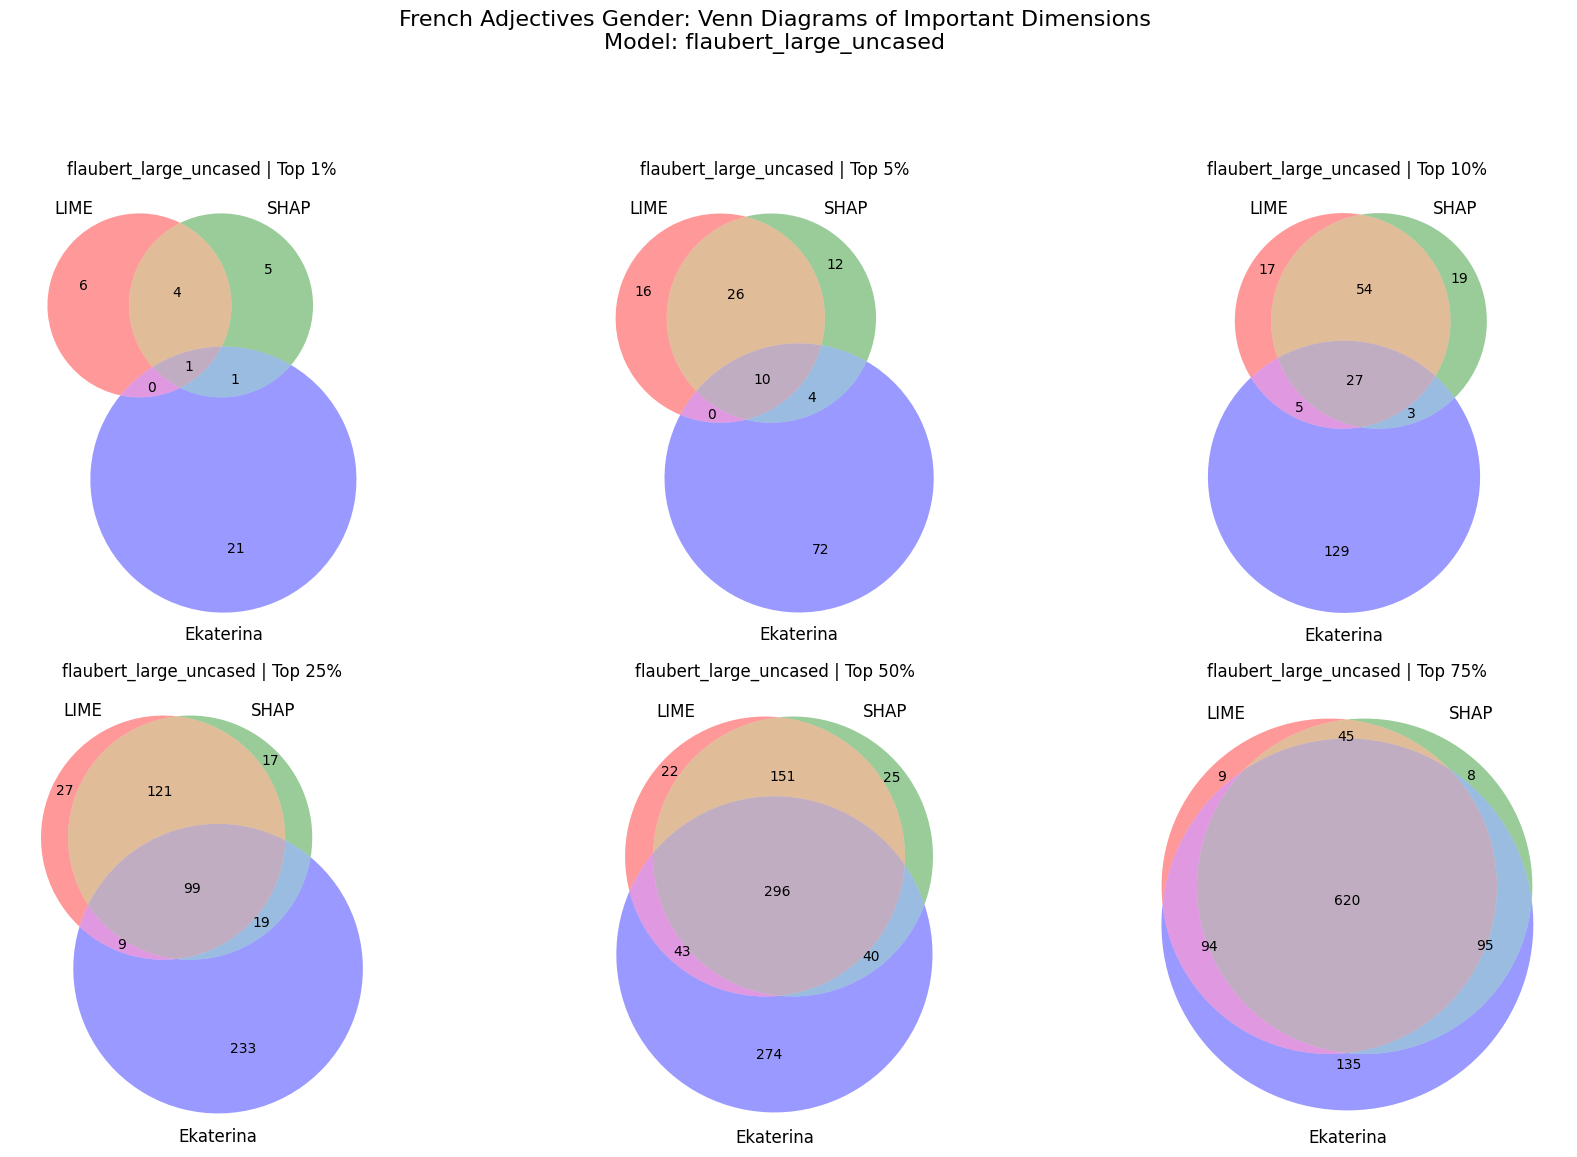

In [28]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import math

all_pretty_models = list(model_map.keys())   # ['flaubert_small_cased', ...]
topn_percs = [p for p in thresholds if p != 100]

for model_to_plot in all_pretty_models:
    print("\n" + "="*70)
    print(f"MODEL: {model_to_plot}")
    print("="*70)
    fig, axes = plt.subplots(2, 3, figsize=(18, 11))
    axes = axes.flatten()
    for i, topn_to_plot in enumerate(topn_percs):
        ax = axes[i]
        try:
            L_col = find_col(lime, model_to_plot)
            S_col = find_col(shap, model_to_plot)
            embed_dim = embed_size[model_to_plot]
            l_df = lime[["Feature", L_col]].copy()
            s_df = shap[["Feature", S_col]].copy()
            l_df["dim"] = l_df["Feature"].str.extract(r"(\d+)").astype(int)
            s_df["dim"] = s_df["Feature"].str.extract(r"(\d+)").astype(int)
            l_df["imp"] = pd.to_numeric(l_df[L_col], errors="coerce").fillna(0)
            s_df["imp"] = pd.to_numeric(s_df[S_col], errors="coerce").fillna(0)
            l_df = l_df.reindex(l_df["imp"].abs().sort_values(ascending=False).index)
            s_df = s_df.reindex(s_df["imp"].abs().sort_values(ascending=False).index)
            k = math.ceil(embed_dim * topn_to_plot / 100)
            L = set(l_df["dim"].iloc[:k])
            S = set(s_df["dim"].iloc[:k])
            E = ek_dims[model_to_plot][topn_to_plot]  # <-- use pretty name for ek_dims
            venn3([L, S, E], set_labels=("LIME", "SHAP", "Ekaterina"), ax=ax)

            ax.set_title(f"{model_to_plot} | Top {topn_to_plot}%", fontsize=12)
        except Exception as e:
            ax.axis('off')
            ax.text(0.5, 0.5, f"Error\n{e}", ha='center', va='center', fontsize=12)
    for j in range(len(topn_percs), 6):
        axes[j].axis('off')
    plt.suptitle(f"French Adjectives Gender: Venn Diagrams of Important Dimensions\nModel: {model_to_plot}", fontsize=16, y=1.05)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()


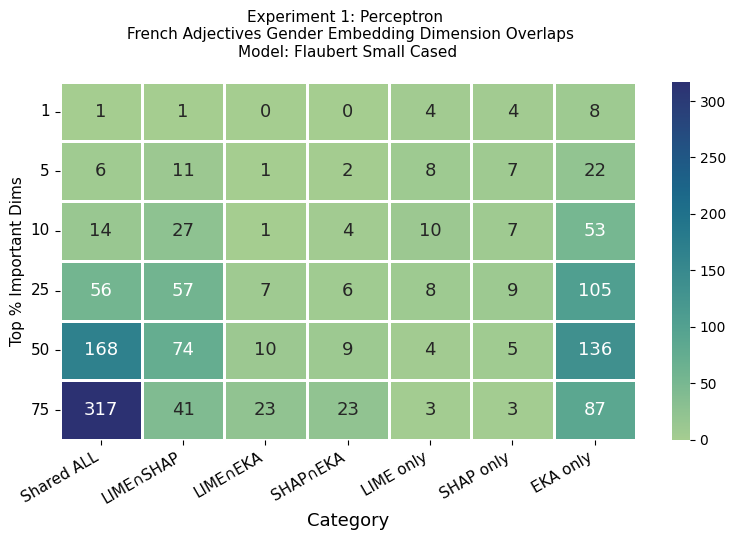

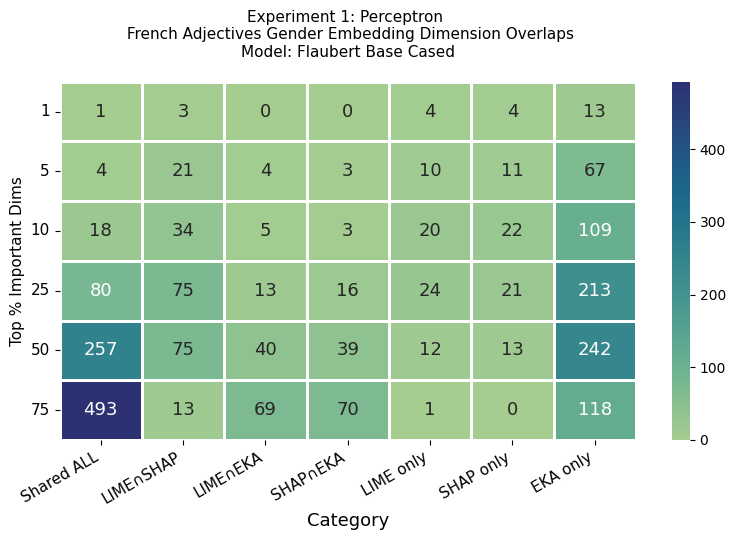

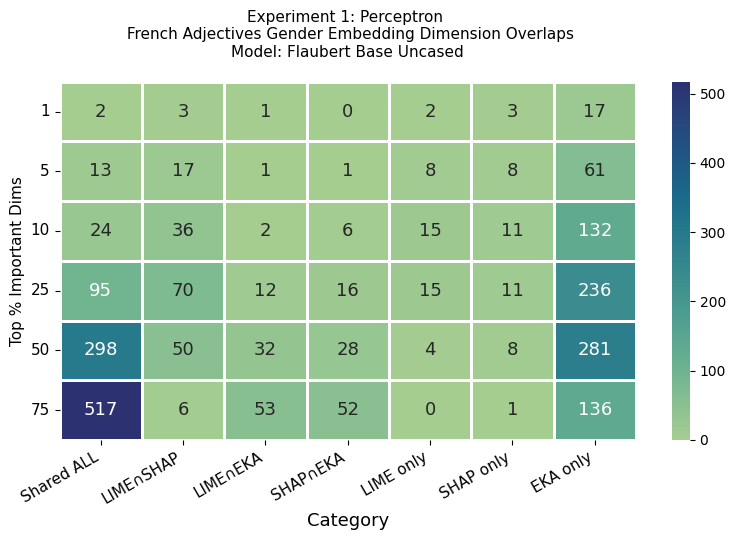

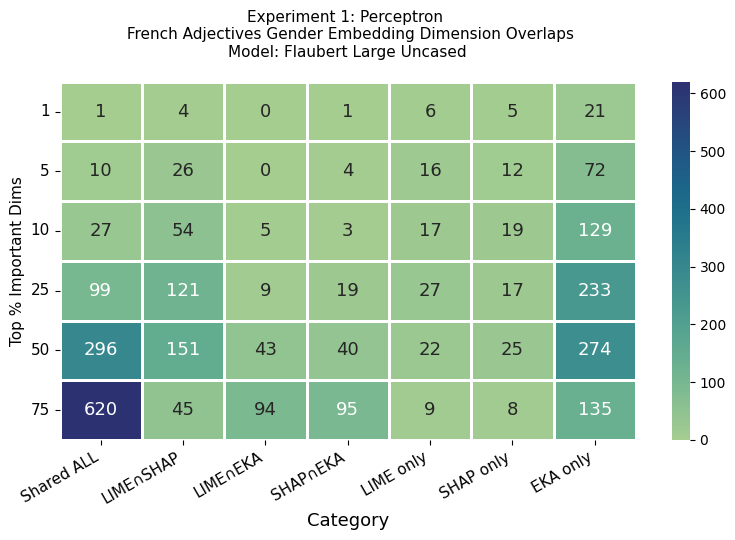

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_order = [
    "Shared ALL", "LIME∩SHAP", "LIME∩EKA", "SHAP∩EKA",
    "LIME only", "SHAP only", "EKA only"
]

for model, df in model_dfs.items():
    plt.figure(figsize=(8, 5.5))
    sns.heatmap(
        df[columns_order], annot=True, fmt="d",
        cmap="crest",   # Try "YlGnBu", "crest", "BuPu", or "Blues"
        linewidths=1, linecolor='white',
        cbar=True,
        annot_kws={"size": 13}
    )
    plt.title(
        f"Experiment 1: Perceptron \n French Adjectives Gender Embedding Dimension Overlaps\nModel: {model.replace('_', ' ').title()}",
        fontsize=11, pad=18
    )
    plt.xlabel("Category", fontsize=13)
    plt.ylabel("Top % Important Dims", fontsize=11)
    plt.xticks(rotation=30, ha="right", fontsize=11)
    plt.yticks(rotation=0, fontsize=11)
    plt.tight_layout()
    plt.show()

    print("\n\n")
